In [1]:
!nvidia-smi

Thu May  2 15:30:48 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   55C    P5              7W /   30W |     302MiB /   4096MiB |     29%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Model Training

In [2]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection


## Install YOLO V8


In [ ]:
# Pip install method (recommended)

# !pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Importing dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aiYtYj3zltrEEAdcWY4y")
project = rf.workspace("ensam-swz2h").project("marathon-dossard-detection")
version = project.version(3)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Marathon-dossard-detection-3 in yolov8:: 100%|██████████| 6708/6708 [00:01<00:00, 4973.17it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=120 imgsz=640 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 288MB/s]
New https://pypi.org/project/ultralytics/8.2.4 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Marathon-dossard-detection-3/data.yaml, epochs=120, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, str

[Errno 2] No such file or directory: '{HOME}'
/content


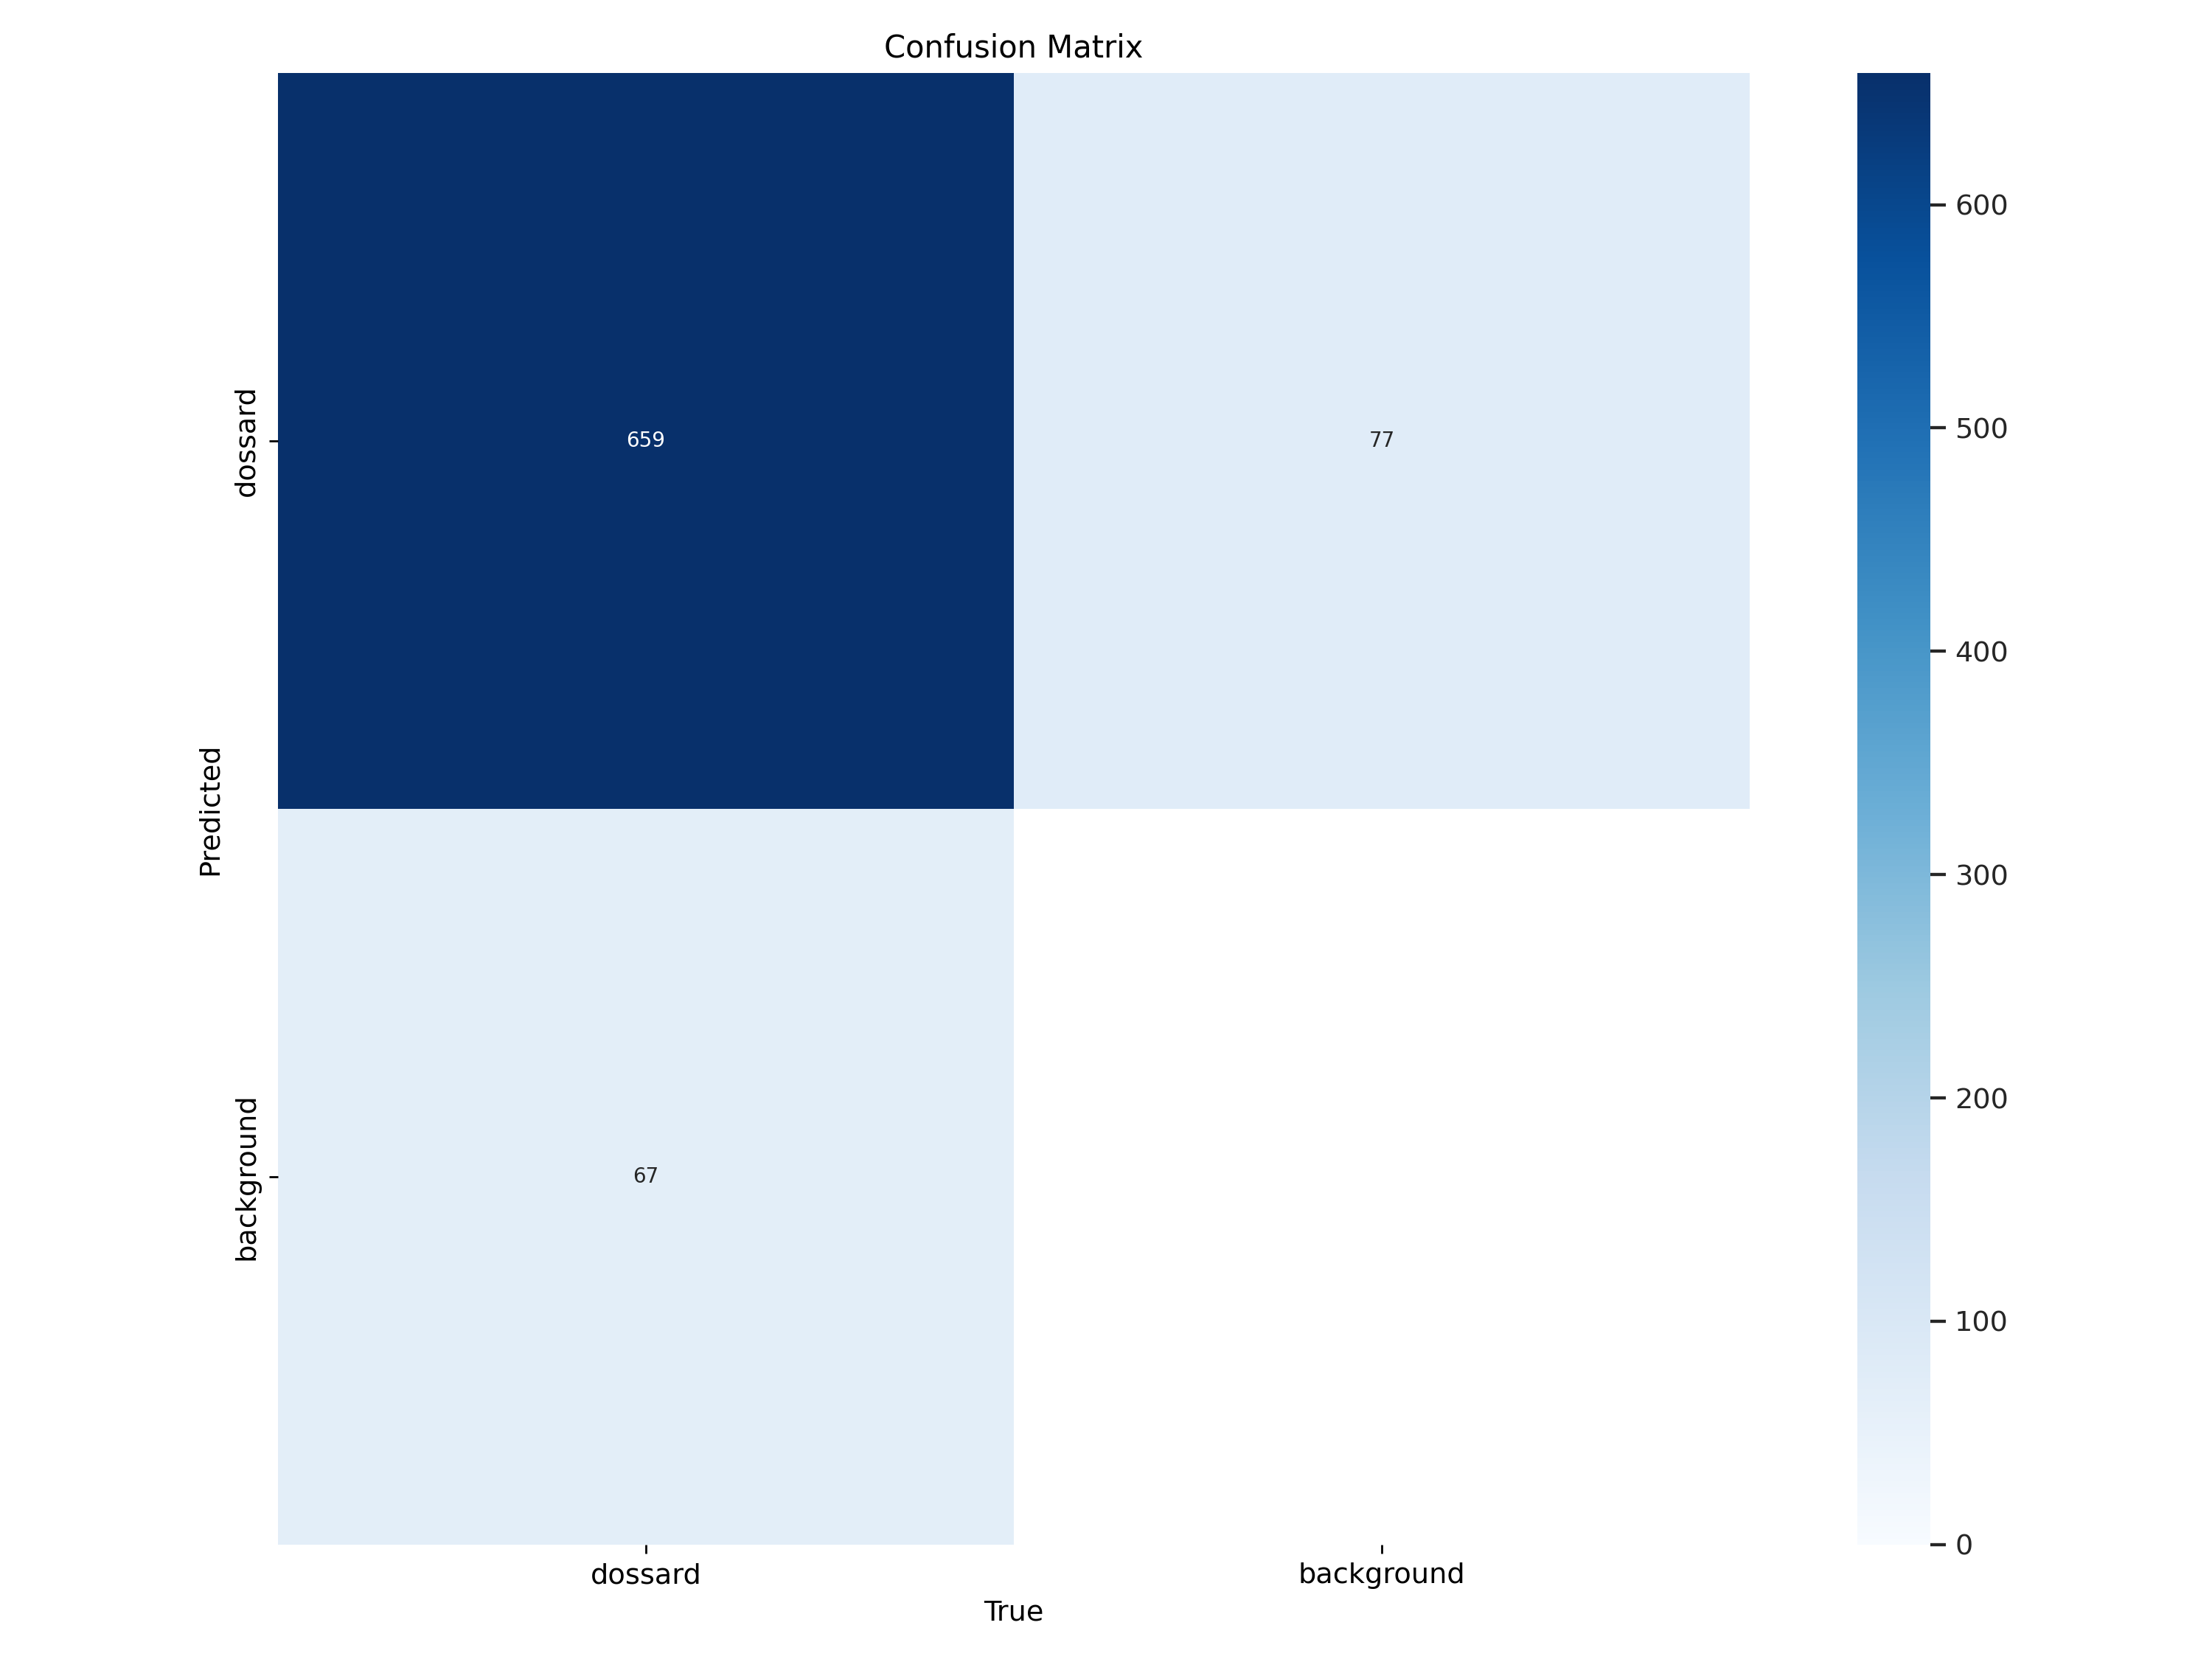

In [ ]:
%cd {HOME}
Image(filename='/content/detect/train/confusion_matrix.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


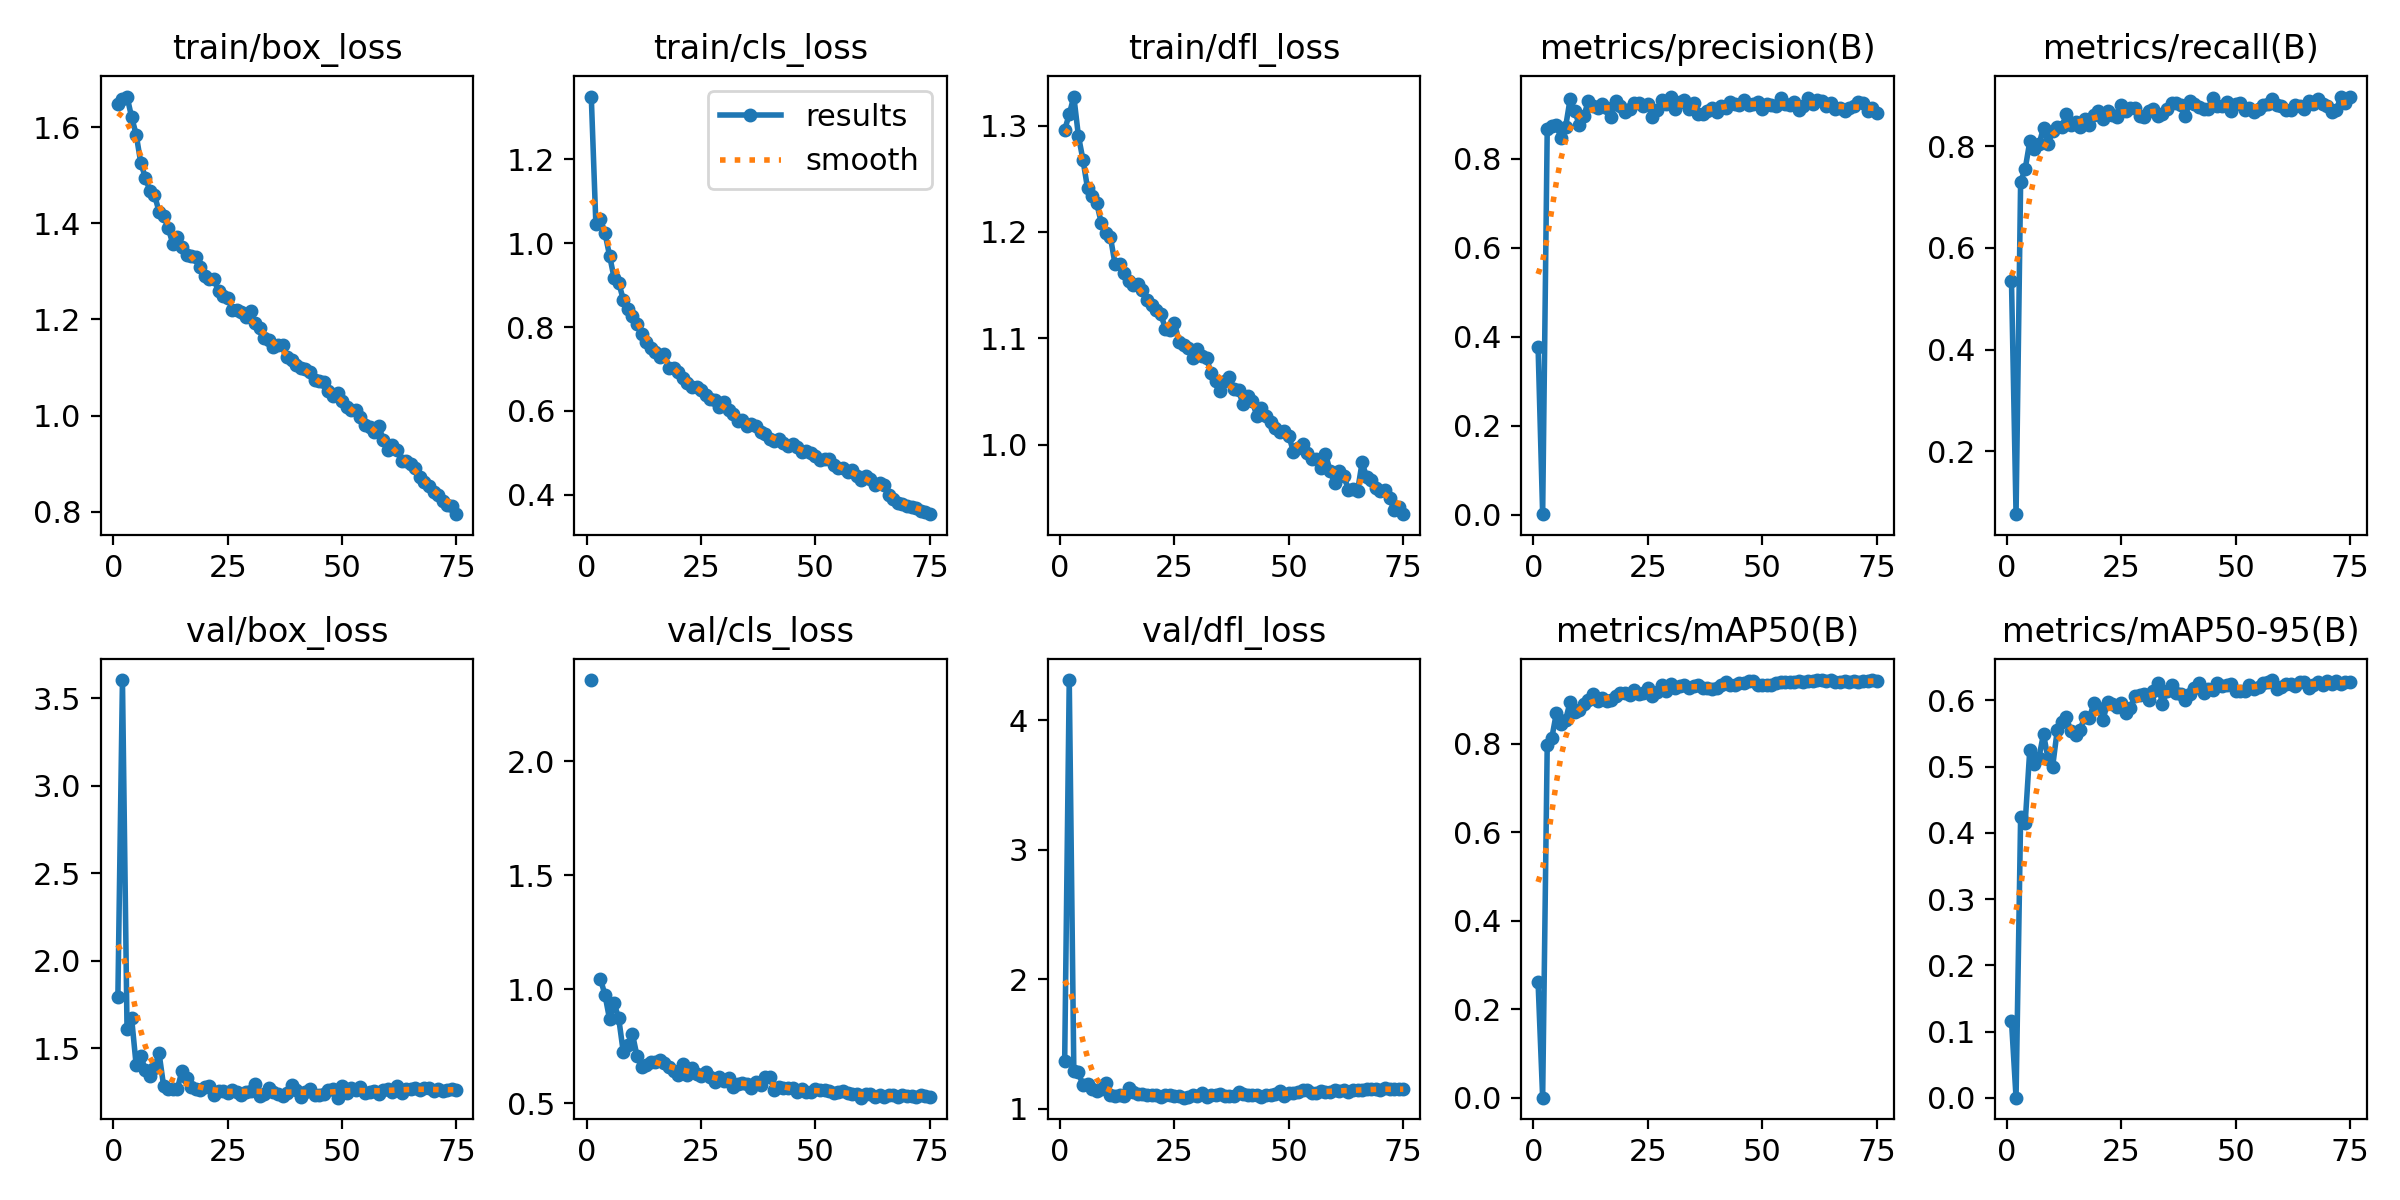

In [ ]:
%cd {HOME}
Image(filename='/content/detect/train/results.png', width=600)

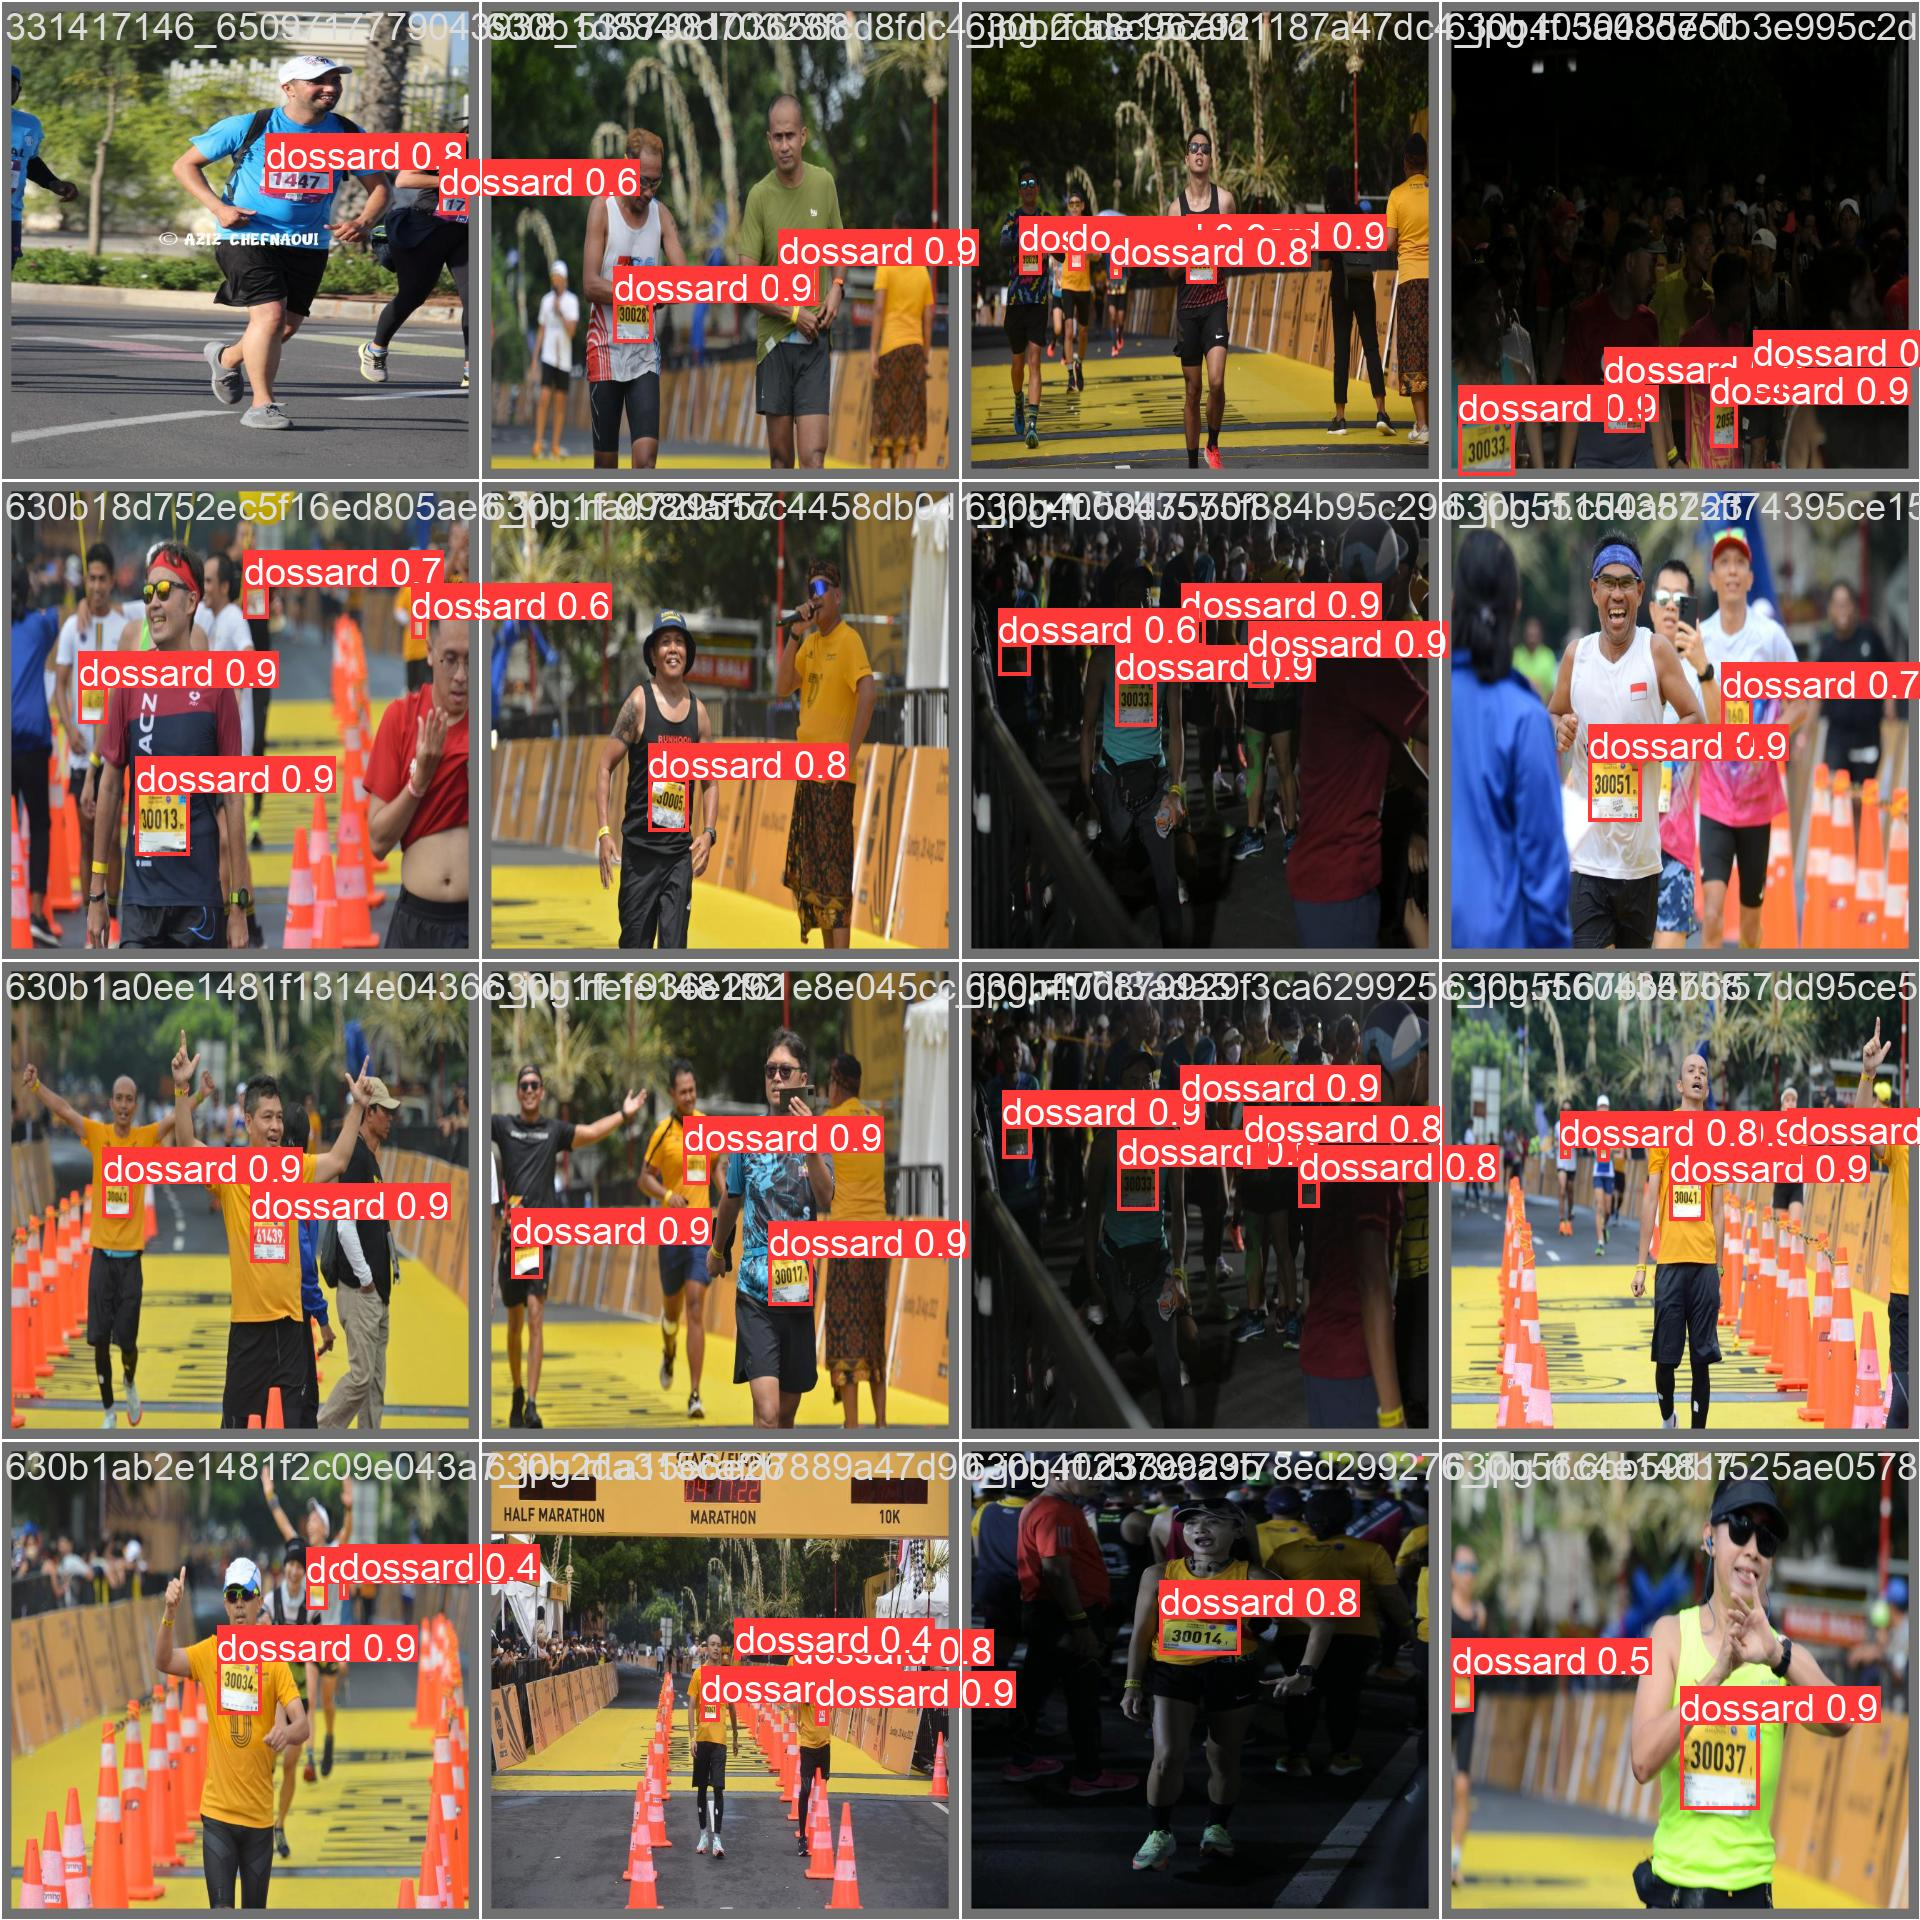

In [ ]:
Image(filename='/content/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/equipements_detection-1/data.yaml

/content
2023-07-14 14:15:31.467152: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 14:15:32.343338: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11132550 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/equipements_detection-1/valid/labels.cache... 99 images, 0 backgrounds, 0 corrupt: 100% 99/99 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:08<00:00,  1.19s/it]
                   all         99        564      0.646      0.509      0.545      0.364
                 Glass         

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/equipements_detection-1/test/images save=True

/content
2023-07-14 14:16:40.088324: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 14:16:40.972235: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11132550 parameters, 0 gradients, 28.5 GFLOPs
image 1/11 /content/datasets/equipements_detection-1/test/images/00275_jpg.rf.32f81b11a3eaf6dce4984f9d8529cdec.jpg: 640x640 2 Glasss, 1 Gloves, 2 Helmets, 3 Persons, 1 Safety-Vest, 16.3ms
image 2/11 /content/datasets/equipements_detection-1/test/images/AightOne0572_jpg.rf.e48c1f615964b1235de89dee74a5e4d7.jpg: 640x640 1 No-Helmet, 1 No-Vest, 2 vests, 1 worker, 16.4ms
image 3/11 /conten

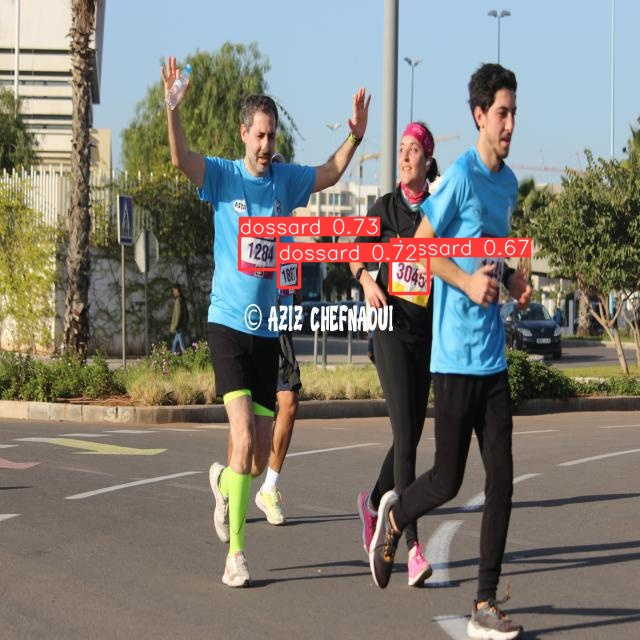

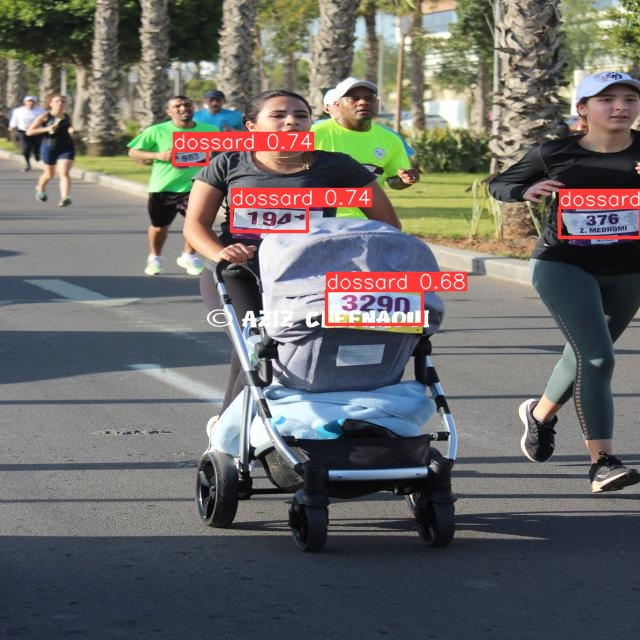

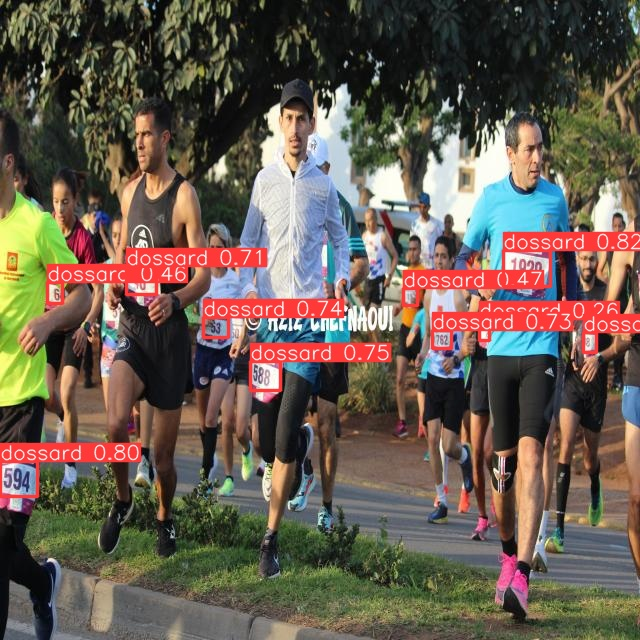

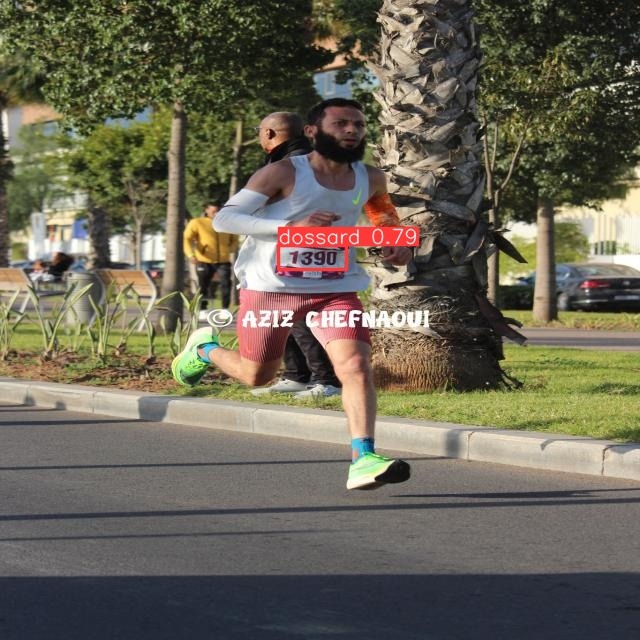

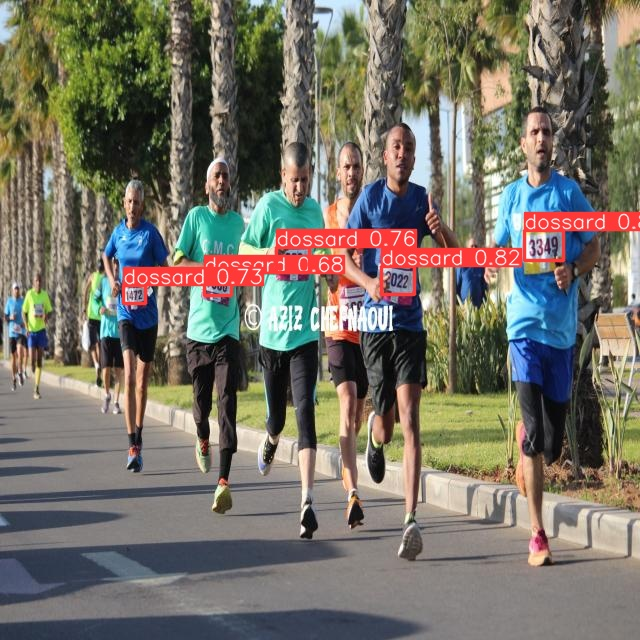

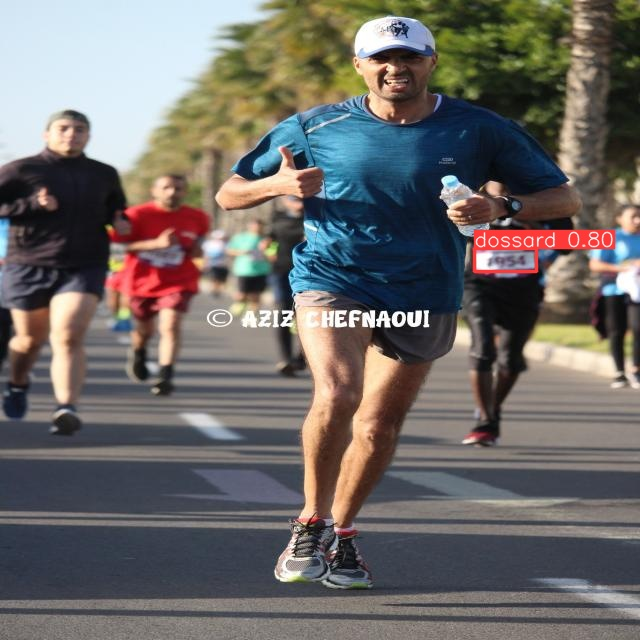

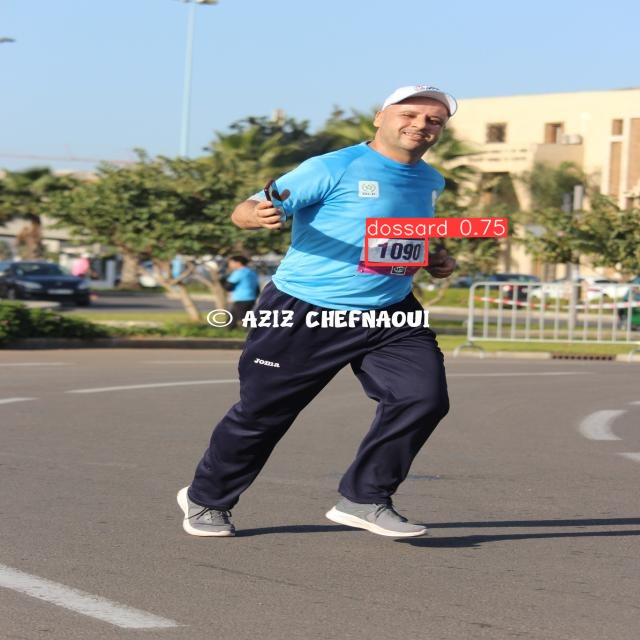

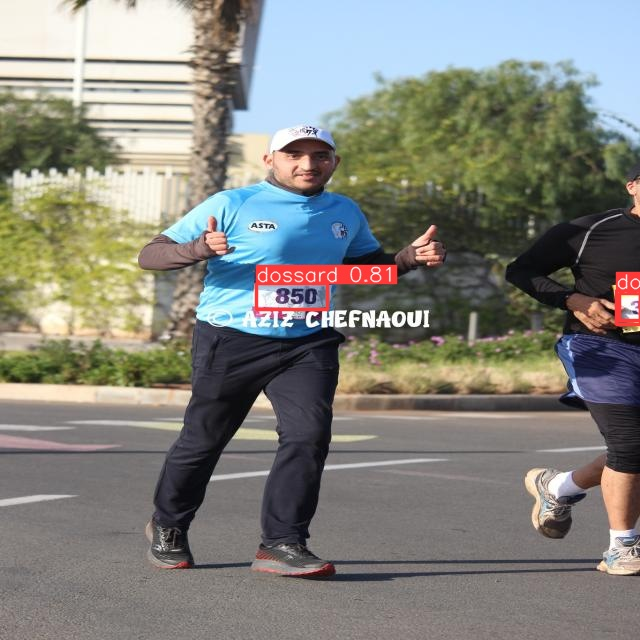

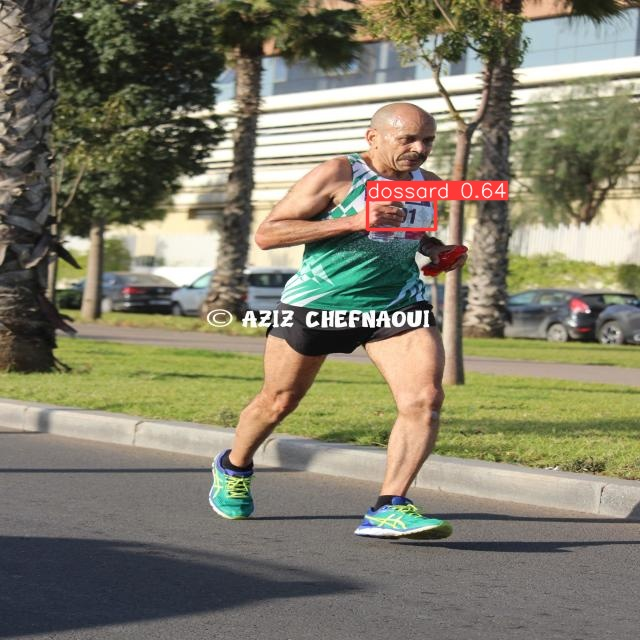

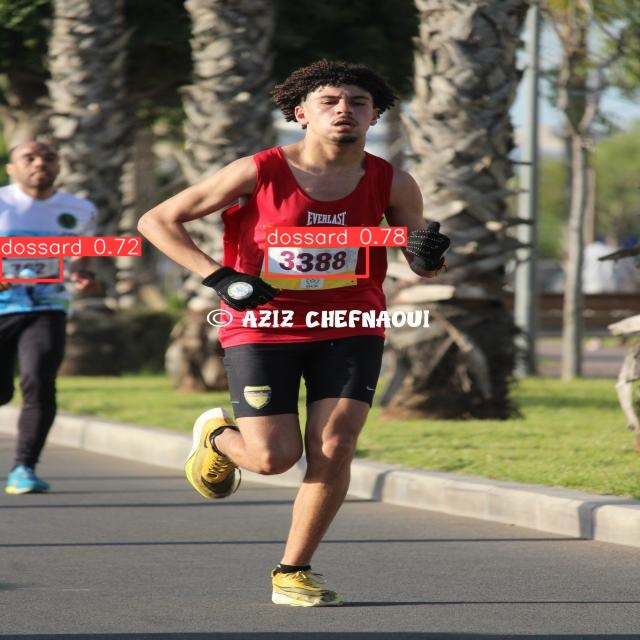

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!yolo task=detect mode=predict model=yolov8s_custom.pt show=True conf=0.5 source"=1.mp4" line_thickness=1 save=True

2023-07-14 14:49:19.620296: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 14:49:20.883907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11132550 parameters, 0 gradients, 28.5 GFLOPs
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



In [ ]:
from ultralytics import YOLO
import cv2
import time
import numpy as np
import pandas
# pre = model.predict(show=True ,conf=0.5, source="1.jpeg", line_thickness=1, save=True)
# print(pre)
model = YOLO("best.pt")
image = cv2.imread('1.jpeg')
results = model(image)
print(results.pandas().xyxy[0])


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11132550 parameters, 0 gradients, 28.5 GFLOPs


AttributeError: ignored

# Detecting bib number and extracting them

In [ ]:
!pip install ultralytics
!pip install paddleocr
!pip install tesseract
!pip install opencv-python
!pip install paddlepaddle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [1]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


[2024/05/02 16:46:20] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\dexte/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\dexte/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

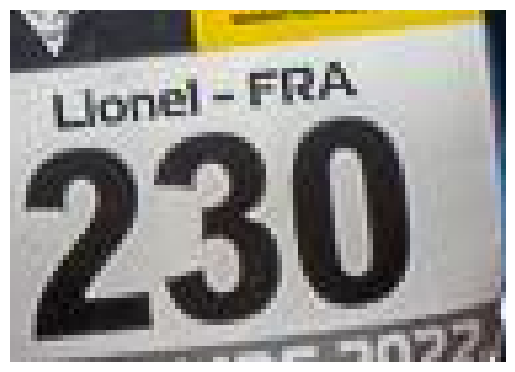

[2024/05/02 16:46:40] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.17852568626403809
[2024/05/02 16:46:40] ppocr DEBUG: cls num  : 1, elapsed : 0.016956090927124023
[2024/05/02 16:46:40] ppocr DEBUG: rec_res num  : 1, elapsed : 0.2592787742614746
path datasets/
[('906', 0.9985945820808411)]
906


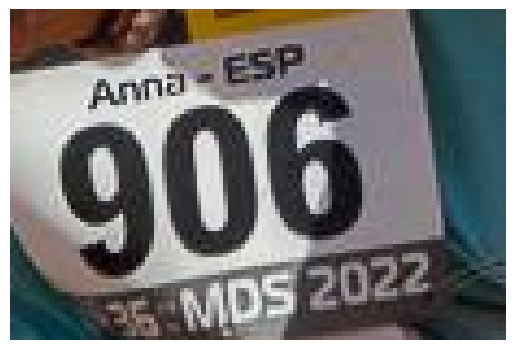


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\10.jpg: 1280x2016 3 dossards, 394.5ms
Speed: 45.9ms preprocess, 394.5ms inference, 6.0ms postprocess per image at shape (1, 3, 1280, 2016)
[2024/05/02 16:46:43] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.17752575874328613
[2024/05/02 16:46:43] ppocr DEBUG: cls num  : 1, elapsed : 0.09075522422790527
[2024/05/02 16:46:43] ppocr DEBUG: rec_res num  : 1, elapsed : 0.19846868515014648
path datasets/
[('APNN', 0.6666485071182251)]


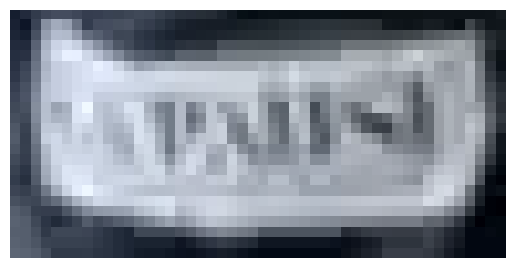

[2024/05/02 16:46:43] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.1296532154083252
[2024/05/02 16:46:43] ppocr DEBUG: cls num  : 2, elapsed : 0.08277726173400879
[2024/05/02 16:46:44] ppocr DEBUG: rec_res num  : 2, elapsed : 0.39893293380737305
path datasets/
[('1051', 0.9989672303199768), ('CDE', 0.7518617510795593)]
1051


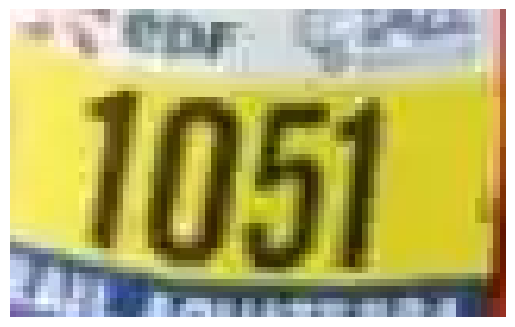

[2024/05/02 16:46:44] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.02791905403137207
[2024/05/02 16:46:44] ppocr DEBUG: cls num  : 3, elapsed : 0.1077120304107666
[2024/05/02 16:46:44] ppocr DEBUG: rec_res num  : 3, elapsed : 0.6682145595550537
path datasets/
[('Kepr', 0.6954732537269592), ('1051', 0.9985751509666443)]
1051


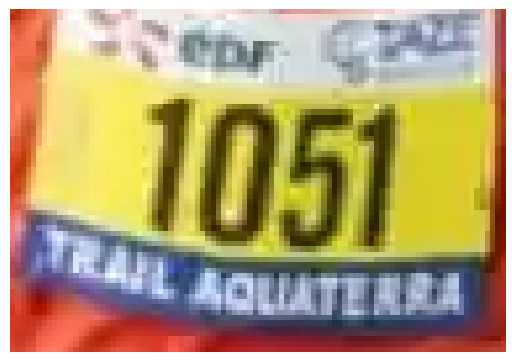


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\11.jpg: 1504x2016 8 dossards, 341.1ms
Speed: 52.9ms preprocess, 341.1ms inference, 6.0ms postprocess per image at shape (1, 3, 1504, 2016)
[2024/05/02 16:46:46] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.017941951751708984
[2024/05/02 16:46:46] ppocr DEBUG: cls num  : 2, elapsed : 0.02593064308166504
[2024/05/02 16:46:47] ppocr DEBUG: rec_res num  : 2, elapsed : 0.3700096607208252
path datasets/
[('2901', 0.8835943937301636)]
2901


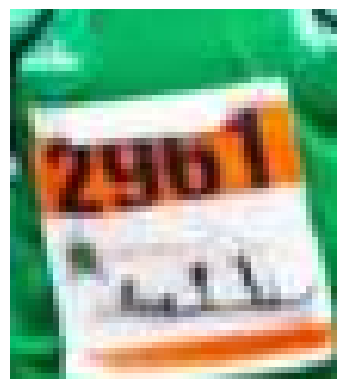

[2024/05/02 16:46:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.018949270248413086
[2024/05/02 16:46:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


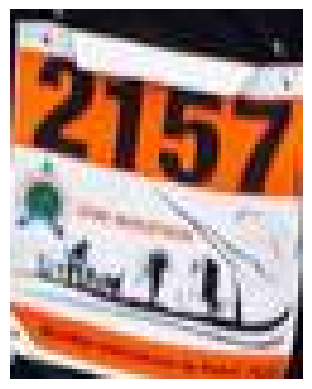

[2024/05/02 16:46:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.040892601013183594
[2024/05/02 16:46:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


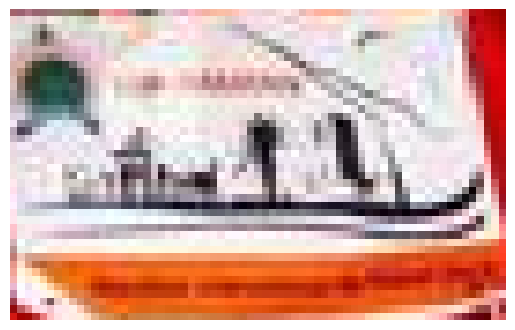

[2024/05/02 16:46:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.021942853927612305
[2024/05/02 16:46:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


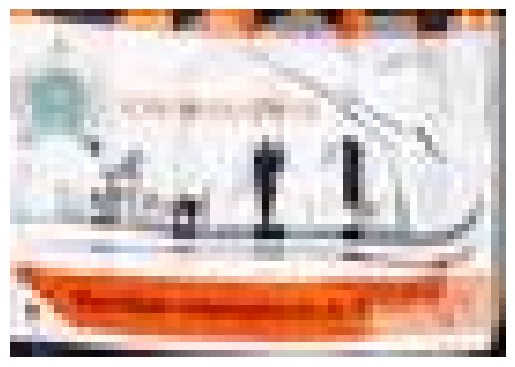

[2024/05/02 16:46:47] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02493429183959961
[2024/05/02 16:46:47] ppocr DEBUG: cls num  : 1, elapsed : 0.012966632843017578
[2024/05/02 16:46:47] ppocr DEBUG: rec_res num  : 1, elapsed : 0.18051695823669434
path datasets/
[('2116', 0.7932945489883423)]
2116


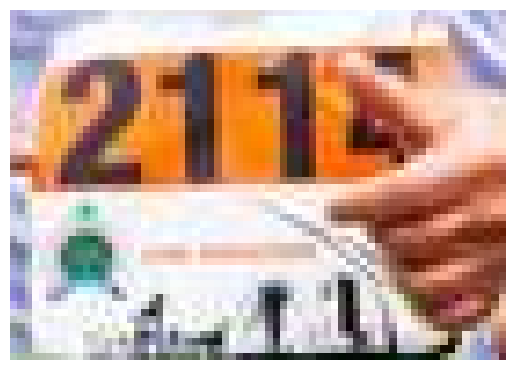

[2024/05/02 16:46:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.019945621490478516
[2024/05/02 16:46:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


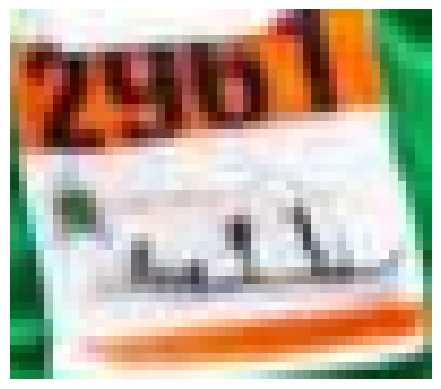

[2024/05/02 16:46:48] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.042885541915893555
[2024/05/02 16:46:48] ppocr DEBUG: cls num  : 2, elapsed : 0.02892136573791504
[2024/05/02 16:46:48] ppocr DEBUG: rec_res num  : 2, elapsed : 0.556513786315918
path datasets/
[('2161', 0.9984675645828247)]
2161


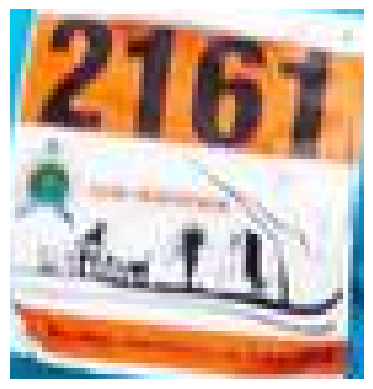

[2024/05/02 16:46:48] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.015958786010742188
[2024/05/02 16:46:48] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:48] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


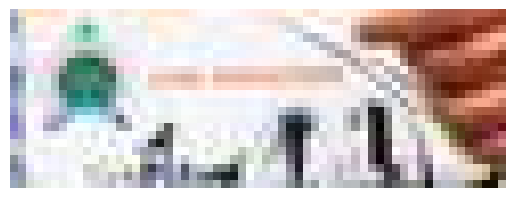


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\12.jpg: 1344x2016 7 dossards, 202.5ms
Speed: 54.9ms preprocess, 202.5ms inference, 36.9ms postprocess per image at shape (1, 3, 1344, 2016)
[2024/05/02 16:46:50] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.20445895195007324
[2024/05/02 16:46:50] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:50] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


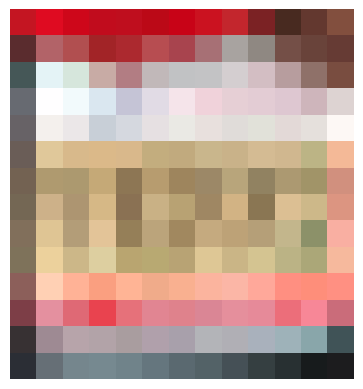

[2024/05/02 16:46:50] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.020943403244018555
[2024/05/02 16:46:50] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:50] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


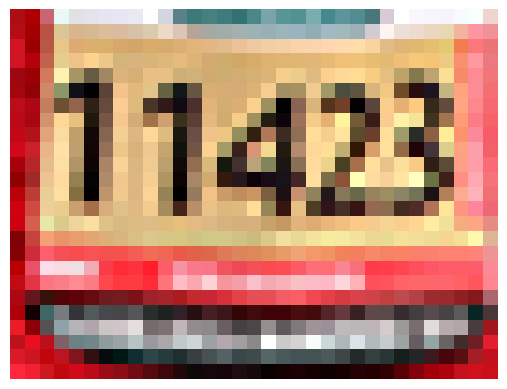

[2024/05/02 16:46:50] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.02592635154724121
[2024/05/02 16:46:50] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:50] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


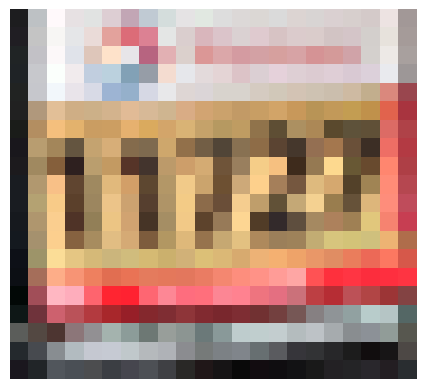

[2024/05/02 16:46:51] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.032912254333496094
[2024/05/02 16:46:51] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:51] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


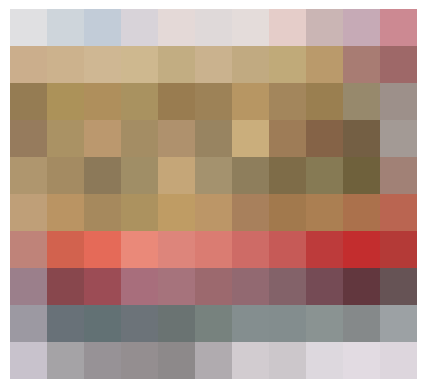

[2024/05/02 16:46:51] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.021944284439086914
[2024/05/02 16:46:51] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:51] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


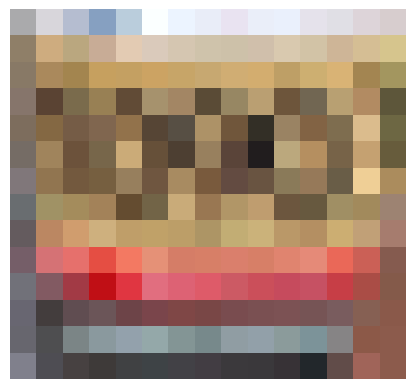

[2024/05/02 16:46:51] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.022936582565307617
[2024/05/02 16:46:51] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:51] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


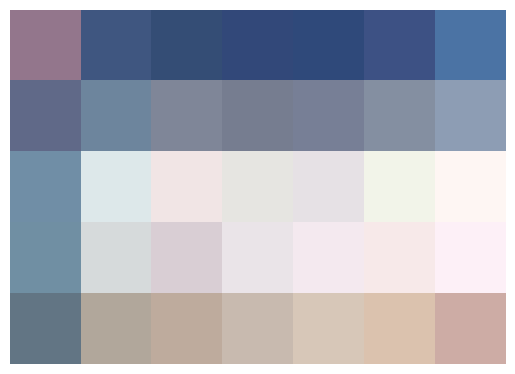

[2024/05/02 16:46:51] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.01495981216430664
[2024/05/02 16:46:51] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:51] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


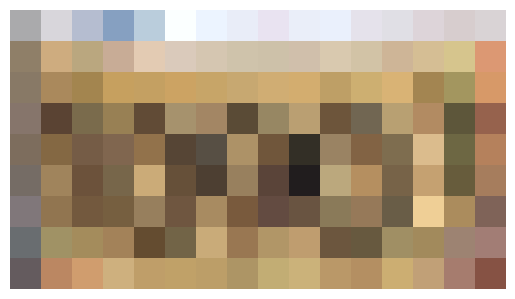


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\13.jpg: 2016x2016 3 dossards, 290.2ms
Speed: 77.8ms preprocess, 290.2ms inference, 2.0ms postprocess per image at shape (1, 3, 2016, 2016)
[2024/05/02 16:46:53] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.02094435691833496
[2024/05/02 16:46:53] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:53] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


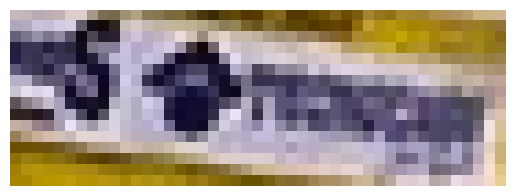

[2024/05/02 16:46:53] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.036901235580444336
[2024/05/02 16:46:53] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:53] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


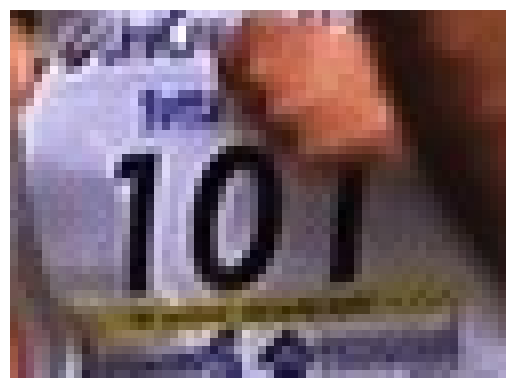

[2024/05/02 16:46:53] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.027925729751586914
[2024/05/02 16:46:53] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:46:53] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


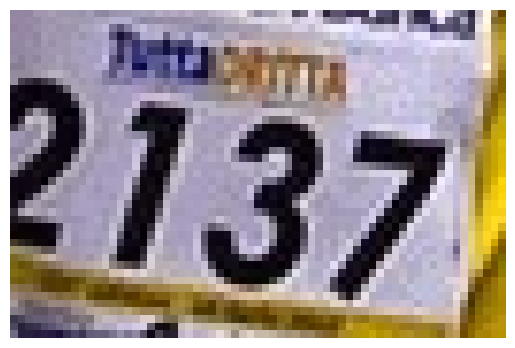


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\14.jpg: 1344x2016 4 dossards, 196.5ms
Speed: 68.8ms preprocess, 196.5ms inference, 14.0ms postprocess per image at shape (1, 3, 1344, 2016)
[2024/05/02 16:46:55] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.23537158966064453
[2024/05/02 16:46:55] ppocr DEBUG: cls num  : 2, elapsed : 0.011967658996582031
[2024/05/02 16:46:55] ppocr DEBUG: rec_res num  : 2, elapsed : 0.48274660110473633
path datasets/
[('230', 0.9995449185371399)]
230


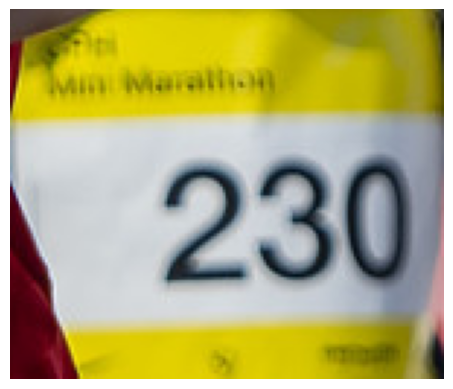

[2024/05/02 16:46:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.20731496810913086
[2024/05/02 16:46:56] ppocr DEBUG: cls num  : 1, elapsed : 0.09474539756774902
[2024/05/02 16:46:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.21442198753356934
path datasets/
[('578', 0.9403017163276672)]
578


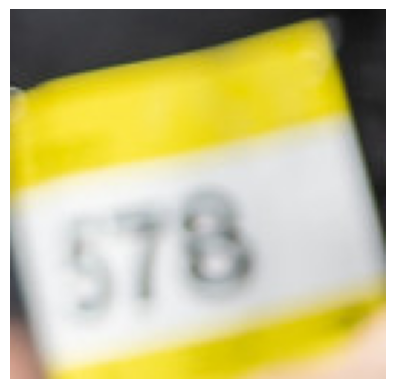

[2024/05/02 16:46:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.025928497314453125
[2024/05/02 16:46:56] ppocr DEBUG: cls num  : 1, elapsed : 0.017955541610717773
[2024/05/02 16:46:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.3460700511932373
path datasets/
[('231', 0.9992936253547668)]
231


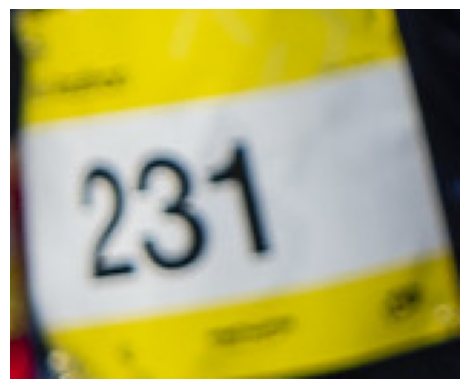

[2024/05/02 16:46:57] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.21046733856201172
[2024/05/02 16:46:57] ppocr DEBUG: cls num  : 4, elapsed : 0.09973359107971191
[2024/05/02 16:46:58] ppocr DEBUG: rec_res num  : 4, elapsed : 0.8682100772857666
path datasets/
[('Marathon', 0.9897952675819397), ('233', 0.9996110796928406), ('5', 0.9620978236198425), ('SPOETNAETER', 0.6873473525047302)]
233


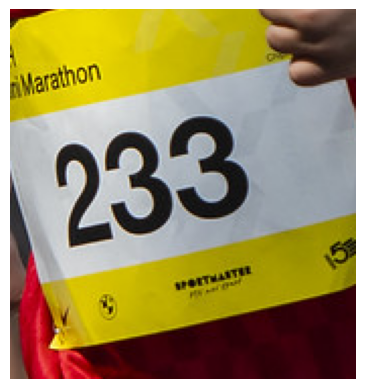


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\15.jpg: 1344x2016 7 dossards, 193.5ms
Speed: 103.7ms preprocess, 193.5ms inference, 4.0ms postprocess per image at shape (1, 3, 1344, 2016)
[2024/05/02 16:47:01] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.025928974151611328
[2024/05/02 16:47:01] ppocr DEBUG: cls num  : 1, elapsed : 0.03490447998046875
[2024/05/02 16:47:01] ppocr DEBUG: rec_res num  : 1, elapsed : 0.7470395565032959
path datasets/
[('2124', 0.994317889213562)]
2124


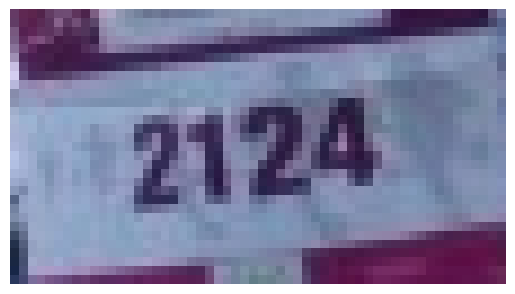

[2024/05/02 16:47:02] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.05186033248901367
[2024/05/02 16:47:02] ppocr DEBUG: cls num  : 1, elapsed : 0.022939205169677734
[2024/05/02 16:47:02] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1775221824645996
path datasets/
[('1984', 0.9992891550064087)]
1984


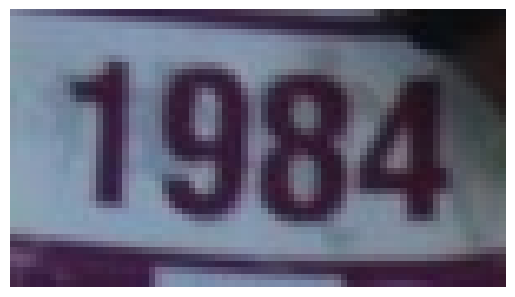

[2024/05/02 16:47:02] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.021942853927612305
[2024/05/02 16:47:02] ppocr DEBUG: cls num  : 1, elapsed : 0.018952131271362305
[2024/05/02 16:47:02] ppocr DEBUG: rec_res num  : 1, elapsed : 0.19547319412231445
path datasets/
[('66', 0.9905494451522827)]
66


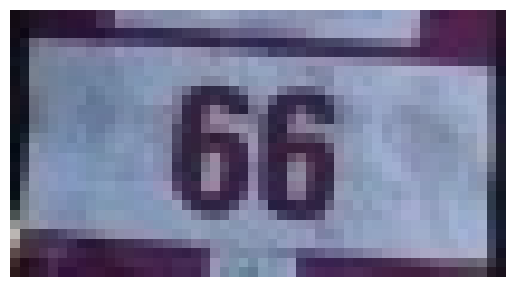

[2024/05/02 16:47:02] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.015967130661010742
[2024/05/02 16:47:02] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:02] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


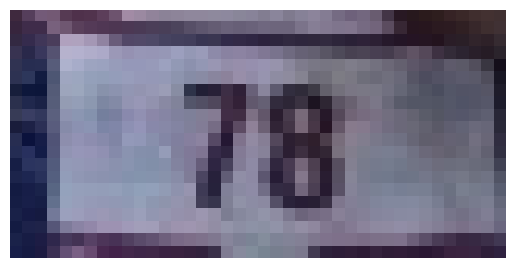

[2024/05/02 16:47:02] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.039893150329589844
[2024/05/02 16:47:02] ppocr DEBUG: cls num  : 1, elapsed : 0.022942066192626953
[2024/05/02 16:47:03] ppocr DEBUG: rec_res num  : 1, elapsed : 0.38407135009765625
path datasets/
[('1989', 0.9987455010414124)]
1989


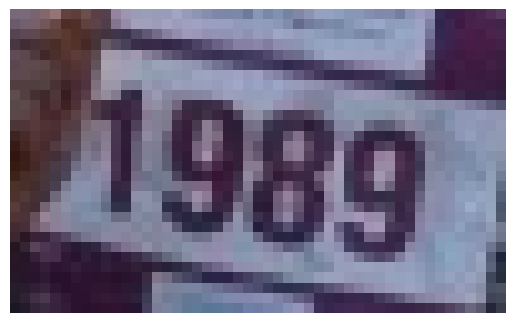

[2024/05/02 16:47:03] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.022940635681152344
[2024/05/02 16:47:03] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:03] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


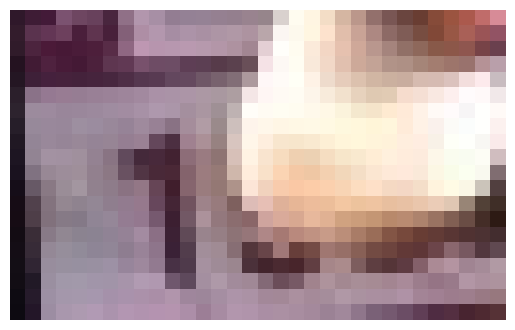

[2024/05/02 16:47:03] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.020946741104125977
[2024/05/02 16:47:03] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:03] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


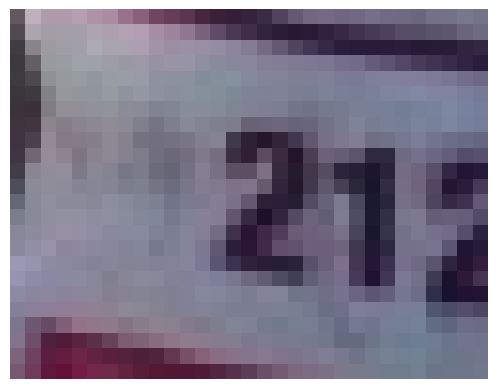


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\16.jpg: 2016x1344 1 dossard, 377.0ms
Speed: 51.9ms preprocess, 377.0ms inference, 9.0ms postprocess per image at shape (1, 3, 2016, 1344)
[2024/05/02 16:47:06] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.15758013725280762
[2024/05/02 16:47:06] ppocr DEBUG: cls num  : 1, elapsed : 0.01196599006652832
[2024/05/02 16:47:06] ppocr DEBUG: rec_res num  : 1, elapsed : 0.3590385913848877
path datasets/
[('3262', 0.9881187677383423)]
3262


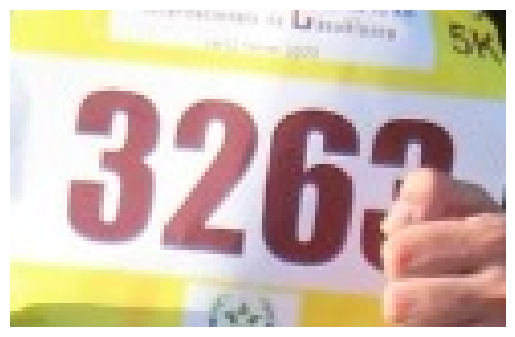


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\17.jpg: 2016x1344 2 dossards, 189.5ms
Speed: 53.9ms preprocess, 189.5ms inference, 5.0ms postprocess per image at shape (1, 3, 2016, 1344)
[2024/05/02 16:47:08] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01994776725769043
[2024/05/02 16:47:08] ppocr DEBUG: cls num  : 1, elapsed : 0.014990806579589844
[2024/05/02 16:47:08] ppocr DEBUG: rec_res num  : 1, elapsed : 0.17050981521606445
path datasets/
[('67', 0.9929341077804565)]
67


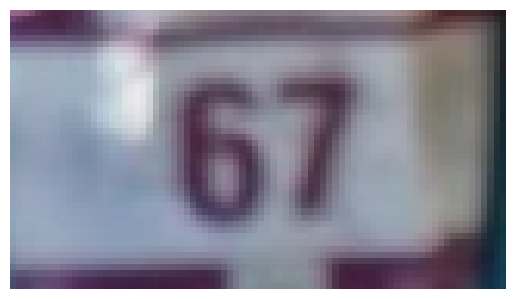

[2024/05/02 16:47:08] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.16256475448608398
[2024/05/02 16:47:08] ppocr DEBUG: cls num  : 1, elapsed : 0.012995481491088867
[2024/05/02 16:47:08] ppocr DEBUG: rec_res num  : 1, elapsed : 0.16951632499694824
path datasets/
[('34', 0.9768117070198059)]
34


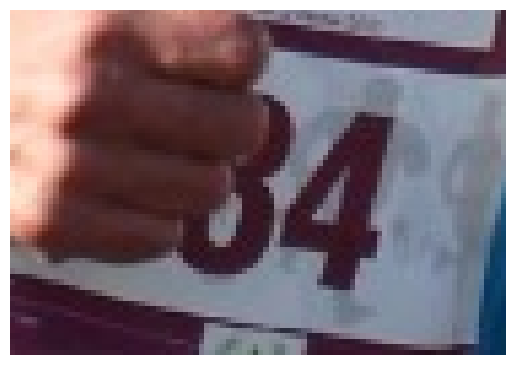


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\18.jpg: 2016x1344 (no detections), 190.4ms
Speed: 46.9ms preprocess, 190.4ms inference, 1.0ms postprocess per image at shape (1, 3, 2016, 1344)

image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\19.jpg: 1440x2016 2 dossards, 391.9ms
Speed: 51.8ms preprocess, 391.9ms inference, 19.9ms postprocess per image at shape (1, 3, 1440, 2016)
[2024/05/02 16:47:11] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.06881356239318848
[2024/05/02 16:47:11] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:11] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


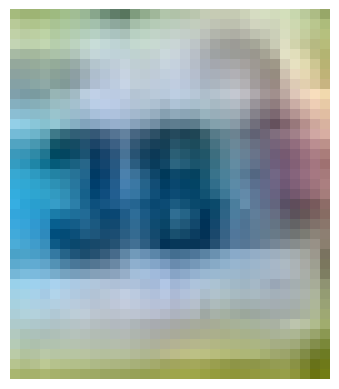

[2024/05/02 16:47:11] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.01396322250366211
[2024/05/02 16:47:11] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:11] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


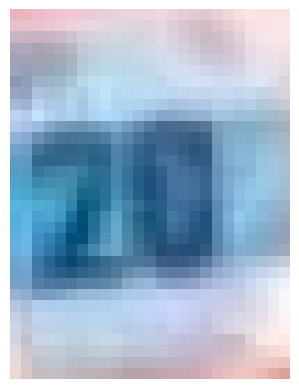


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\2.jpg: 1536x2016 1 dossard, 449.9ms
Speed: 52.9ms preprocess, 449.9ms inference, 6.0ms postprocess per image at shape (1, 3, 1536, 2016)
[2024/05/02 16:47:13] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.20544838905334473
[2024/05/02 16:47:13] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:13] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


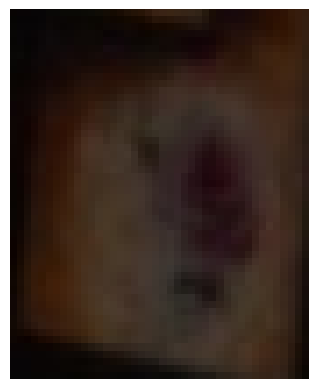


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\20.jpg: 1024x2016 (no detections), 449.8ms
Speed: 75.8ms preprocess, 449.8ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 2016)

image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\21.jpg: 1600x2016 2 dossards, 558.4ms
Speed: 72.8ms preprocess, 558.4ms inference, 5.0ms postprocess per image at shape (1, 3, 1600, 2016)
[2024/05/02 16:47:18] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.12666106224060059
[2024/05/02 16:47:18] ppocr DEBUG: cls num  : 4, elapsed : 0.030915498733520508
[2024/05/02 16:47:19] ppocr DEBUG: rec_res num  : 4, elapsed : 0.7719709873199463
path datasets/
[('39', 0.9996517896652222), ('Ufe', 0.7773273587226868), ('vOie', 0.6554480791091919)]
39


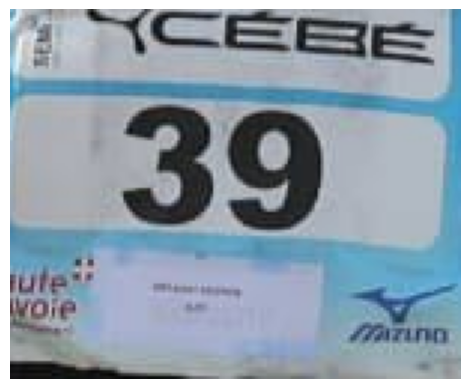

[2024/05/02 16:47:21] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.524599552154541
[2024/05/02 16:47:21] ppocr DEBUG: cls num  : 1, elapsed : 0.17353391647338867
[2024/05/02 16:47:21] ppocr DEBUG: rec_res num  : 1, elapsed : 0.30396294593811035
path datasets/
[('39', 0.999610424041748)]
39


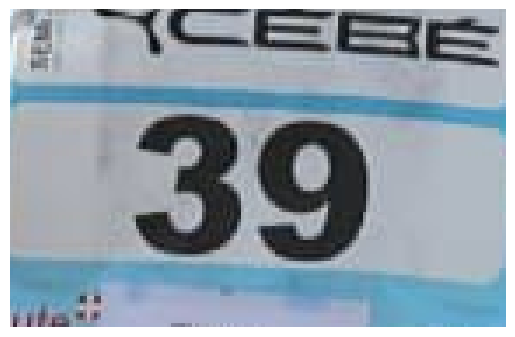


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\22.jpg: 1344x2016 11 dossards, 194.5ms
Speed: 46.9ms preprocess, 194.5ms inference, 6.0ms postprocess per image at shape (1, 3, 1344, 2016)
[2024/05/02 16:47:24] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.016954421997070312
[2024/05/02 16:47:24] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:24] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


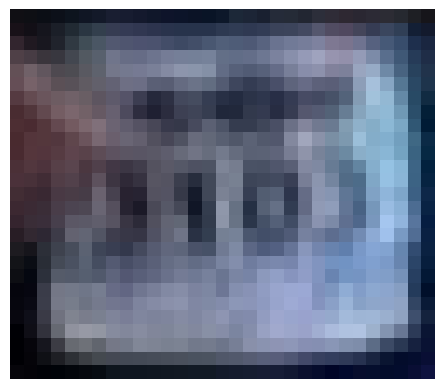

[2024/05/02 16:47:24] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019945383071899414
[2024/05/02 16:47:24] ppocr DEBUG: cls num  : 1, elapsed : 0.01894831657409668
[2024/05/02 16:47:24] ppocr DEBUG: rec_res num  : 1, elapsed : 0.21642041206359863
path datasets/
[('34', 0.9995824098587036)]
34


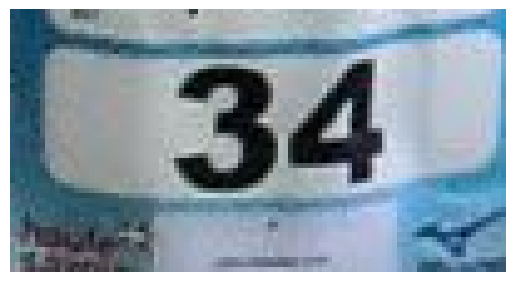

[2024/05/02 16:47:24] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.01794123649597168
[2024/05/02 16:47:24] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:24] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


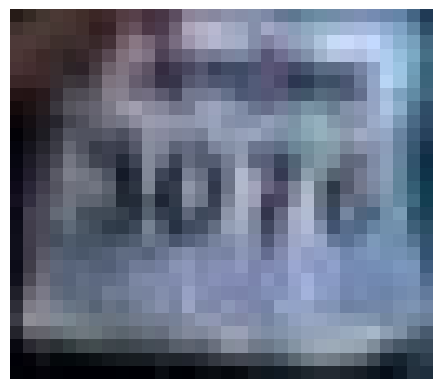

[2024/05/02 16:47:25] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.02792525291442871
[2024/05/02 16:47:25] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:25] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


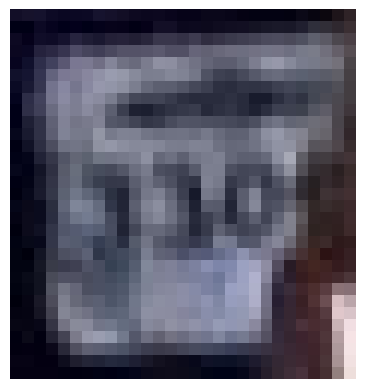

[2024/05/02 16:47:25] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.1047205924987793
[2024/05/02 16:47:25] ppocr DEBUG: cls num  : 2, elapsed : 0.26828432083129883
[2024/05/02 16:47:26] ppocr DEBUG: rec_res num  : 2, elapsed : 0.5934441089630127
path datasets/
[('33', 0.9996905326843262)]
33


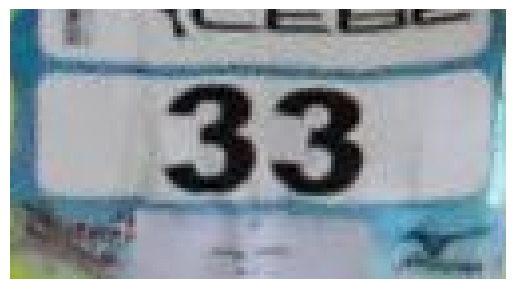

[2024/05/02 16:47:26] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.1934797763824463
[2024/05/02 16:47:26] ppocr DEBUG: cls num  : 1, elapsed : 0.013964653015136719
[2024/05/02 16:47:26] ppocr DEBUG: rec_res num  : 1, elapsed : 0.3560483455657959
path datasets/
[('33', 0.998869776725769)]
33


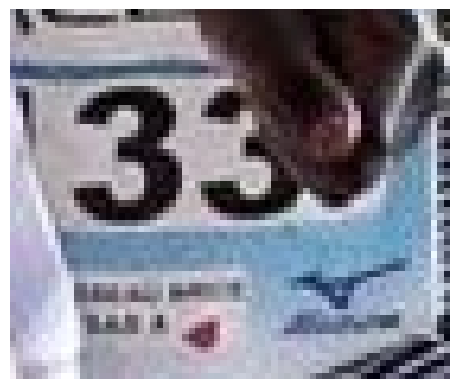

[2024/05/02 16:47:26] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.20046329498291016
[2024/05/02 16:47:27] ppocr DEBUG: cls num  : 1, elapsed : 0.0189511775970459
[2024/05/02 16:47:27] ppocr DEBUG: rec_res num  : 1, elapsed : 0.24434471130371094
path datasets/
[('4295', 0.8964148163795471)]
4295


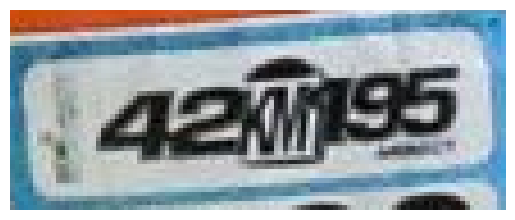

[2024/05/02 16:47:27] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.08577322959899902
[2024/05/02 16:47:27] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:27] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


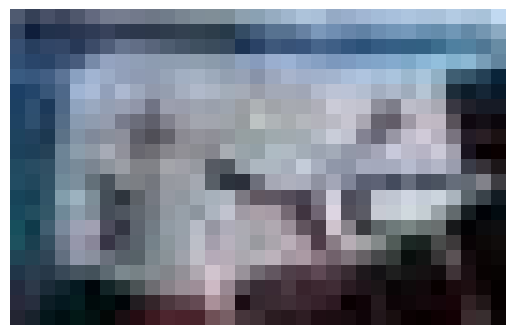

[2024/05/02 16:47:27] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.132643461227417
[2024/05/02 16:47:27] ppocr DEBUG: cls num  : 3, elapsed : 0.10073280334472656
[2024/05/02 16:47:28] ppocr DEBUG: rec_res num  : 3, elapsed : 0.6981229782104492
path datasets/
[('LYCEEE', 0.8037979006767273), ('34', 0.9996488094329834)]
34


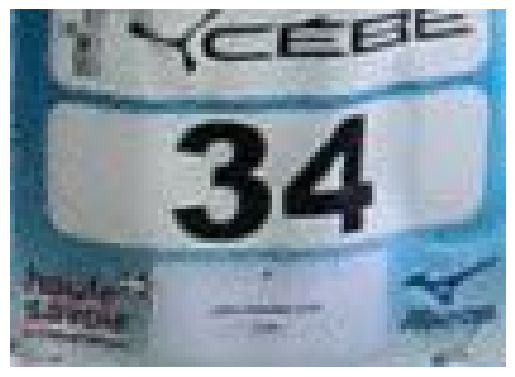

[2024/05/02 16:47:28] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.02094292640686035
[2024/05/02 16:47:28] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:28] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


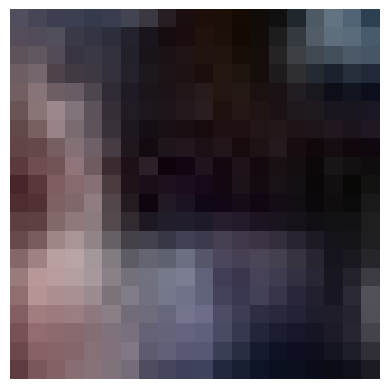

[2024/05/02 16:47:28] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.16655492782592773
[2024/05/02 16:47:28] ppocr DEBUG: cls num  : 1, elapsed : 0.07280087471008301
[2024/05/02 16:47:28] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1545875072479248
path datasets/
[('40', 0.9978559613227844)]
40


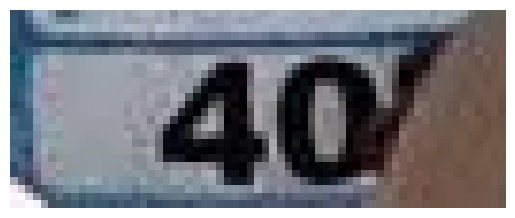


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\23.jpg: 1152x2016 3 dossards, 385.0ms
Speed: 47.9ms preprocess, 385.0ms inference, 5.0ms postprocess per image at shape (1, 3, 1152, 2016)
[2024/05/02 16:47:31] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.17552828788757324
[2024/05/02 16:47:31] ppocr DEBUG: cls num  : 3, elapsed : 0.01695537567138672
[2024/05/02 16:47:31] ppocr DEBUG: rec_res num  : 3, elapsed : 0.45378661155700684
path datasets/
[('oounolnd,', 0.5344937443733215), ('9', 0.6436256766319275), ('CYRIL', 0.9959418177604675)]
9


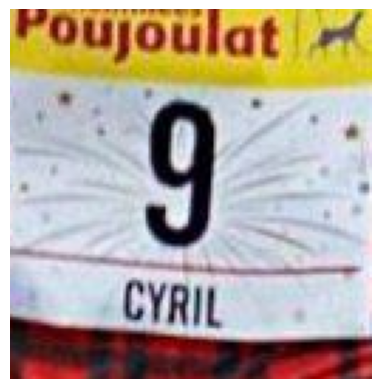

[2024/05/02 16:47:32] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.22539663314819336
[2024/05/02 16:47:32] ppocr DEBUG: cls num  : 2, elapsed : 0.08576774597167969
[2024/05/02 16:47:32] ppocr DEBUG: rec_res num  : 2, elapsed : 0.428844690322876
path datasets/
[('61', 0.997305154800415)]
61


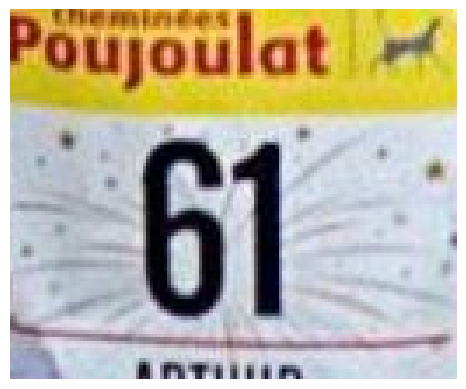

[2024/05/02 16:47:32] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.024941205978393555
[2024/05/02 16:47:32] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:32] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


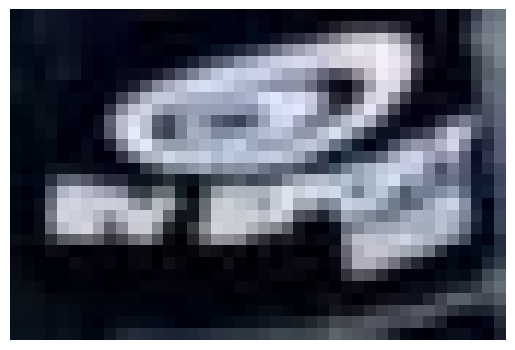


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\24.jpg: 1344x2016 5 dossards, 215.4ms
Speed: 40.9ms preprocess, 215.4ms inference, 7.0ms postprocess per image at shape (1, 3, 1344, 2016)
[2024/05/02 16:47:34] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.032915592193603516
[2024/05/02 16:47:34] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:34] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


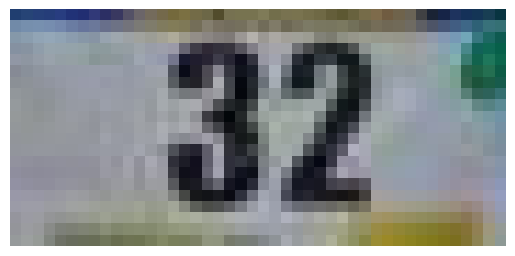

[2024/05/02 16:47:34] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.029605865478515625
[2024/05/02 16:47:34] ppocr DEBUG: cls num  : 1, elapsed : 0.023936748504638672
[2024/05/02 16:47:35] ppocr DEBUG: rec_res num  : 1, elapsed : 0.37898874282836914
path datasets/
[('219', 0.9985237121582031)]
219


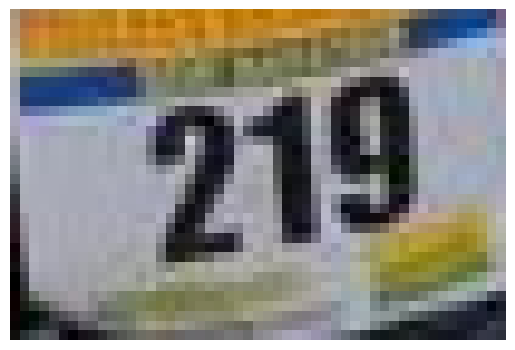

[2024/05/02 16:47:35] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.032911062240600586
[2024/05/02 16:47:35] ppocr DEBUG: cls num  : 1, elapsed : 0.02992081642150879
[2024/05/02 16:47:35] ppocr DEBUG: rec_res num  : 1, elapsed : 0.34707188606262207
path datasets/
[('35', 0.9990949630737305)]
35


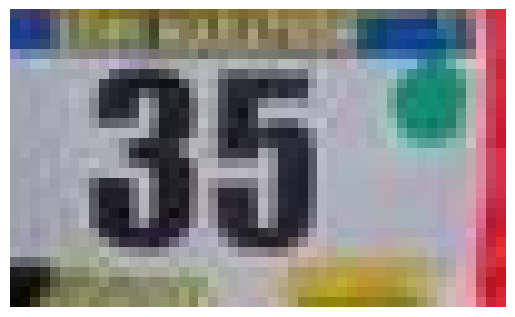

[2024/05/02 16:47:35] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.02194046974182129
[2024/05/02 16:47:35] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:35] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


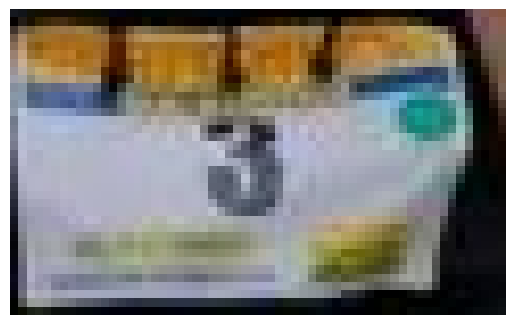

[2024/05/02 16:47:36] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.020944595336914062
[2024/05/02 16:47:36] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:36] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


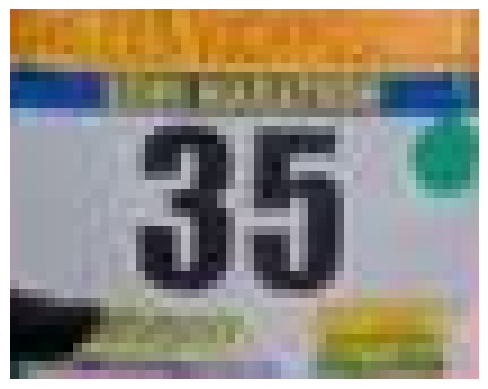


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\25.jpg: 1600x2016 5 dossards, 233.4ms
Speed: 67.8ms preprocess, 233.4ms inference, 4.0ms postprocess per image at shape (1, 3, 1600, 2016)
[2024/05/02 16:47:38] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03191494941711426
[2024/05/02 16:47:38] ppocr DEBUG: cls num  : 1, elapsed : 0.020951271057128906
[2024/05/02 16:47:38] ppocr DEBUG: rec_res num  : 1, elapsed : 0.14161944389343262
path datasets/
[('1833', 0.999542236328125)]
1833


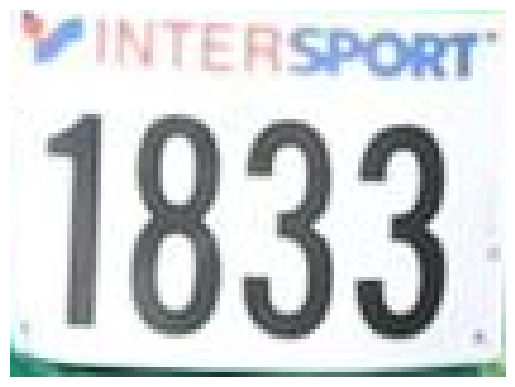

[2024/05/02 16:47:38] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03789925575256348
[2024/05/02 16:47:38] ppocr DEBUG: cls num  : 1, elapsed : 0.019945859909057617
[2024/05/02 16:47:38] ppocr DEBUG: rec_res num  : 1, elapsed : 0.21143388748168945
path datasets/
[('1759', 0.9998910427093506)]
1759


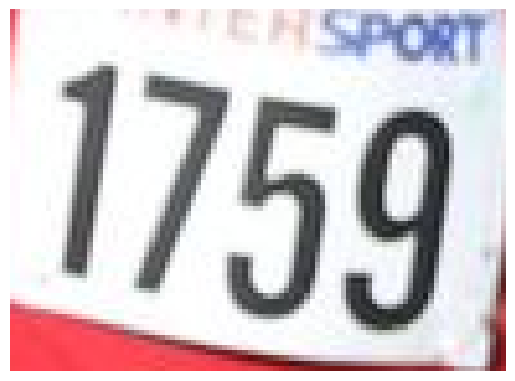

[2024/05/02 16:47:38] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.16356563568115234
[2024/05/02 16:47:38] ppocr DEBUG: cls num  : 2, elapsed : 0.015952110290527344
[2024/05/02 16:47:39] ppocr DEBUG: rec_res num  : 2, elapsed : 0.5714848041534424
path datasets/
[('INTERSPORT', 0.9931306838989258), ('1795', 0.9997280836105347)]
1795


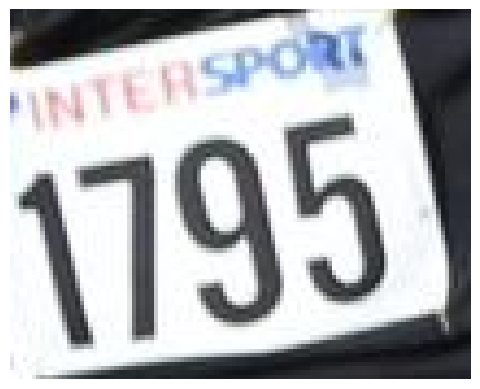

[2024/05/02 16:47:39] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.15956950187683105
[2024/05/02 16:47:39] ppocr DEBUG: cls num  : 1, elapsed : 0.009974241256713867
[2024/05/02 16:47:39] ppocr DEBUG: rec_res num  : 1, elapsed : 0.15658283233642578
path datasets/
[('17', 0.9961303472518921)]
17


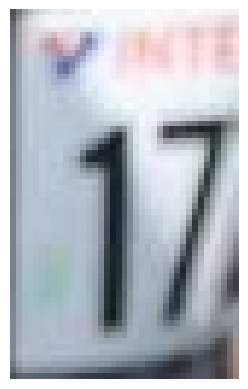

[2024/05/02 16:47:39] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.1934800148010254
[2024/05/02 16:47:39] ppocr DEBUG: cls num  : 1, elapsed : 0.01894831657409668
[2024/05/02 16:47:40] ppocr DEBUG: rec_res num  : 1, elapsed : 0.2872169017791748
path datasets/
[('1860', 0.9953522086143494)]
1860


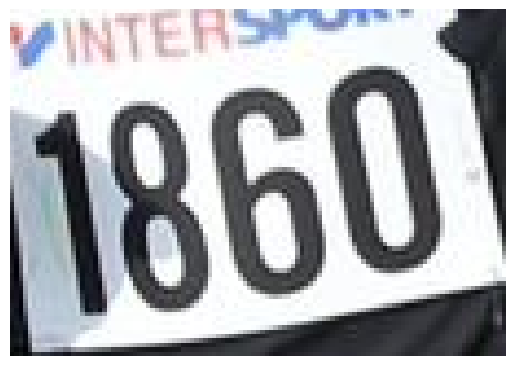


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\26.jpg: 1408x2016 4 dossards, 363.0ms
Speed: 44.9ms preprocess, 363.0ms inference, 10.0ms postprocess per image at shape (1, 3, 1408, 2016)
[2024/05/02 16:47:42] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.10571932792663574
[2024/05/02 16:47:42] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:42] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


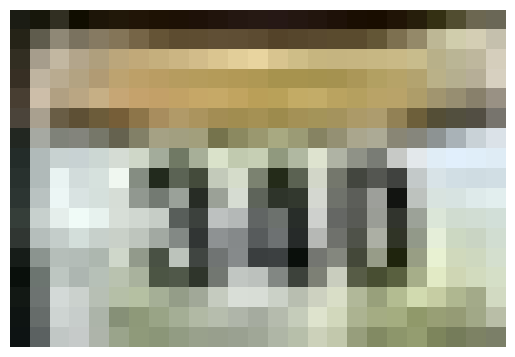

[2024/05/02 16:47:42] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.014959573745727539
[2024/05/02 16:47:42] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:42] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


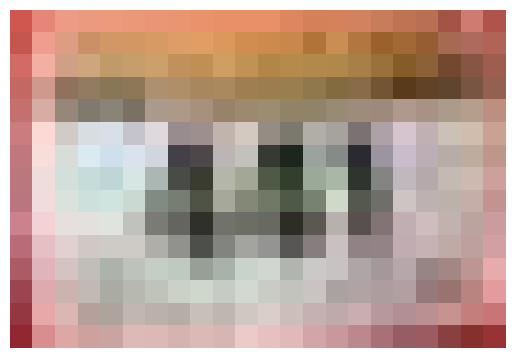

[2024/05/02 16:47:42] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.018949031829833984
[2024/05/02 16:47:42] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:42] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


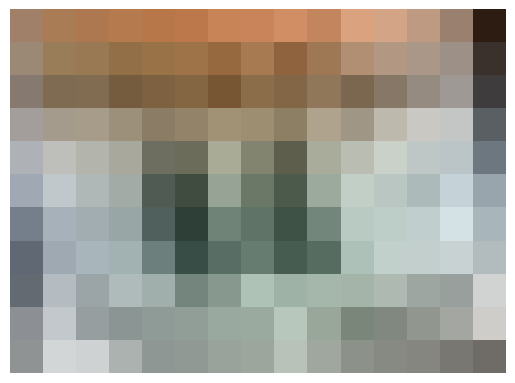

[2024/05/02 16:47:42] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.04886960983276367
[2024/05/02 16:47:42] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:42] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


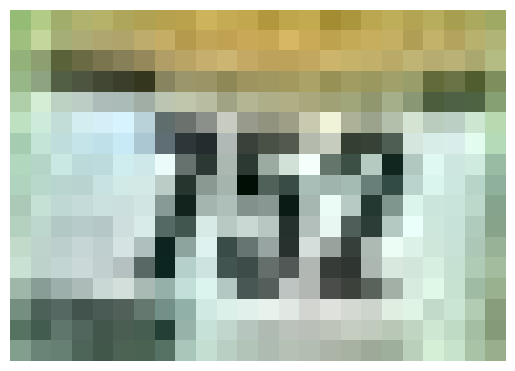


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\27.jpg: 1152x2016 6 dossards, 164.6ms
Speed: 45.9ms preprocess, 164.6ms inference, 2.0ms postprocess per image at shape (1, 3, 1152, 2016)
[2024/05/02 16:47:44] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.012963533401489258
[2024/05/02 16:47:44] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:44] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


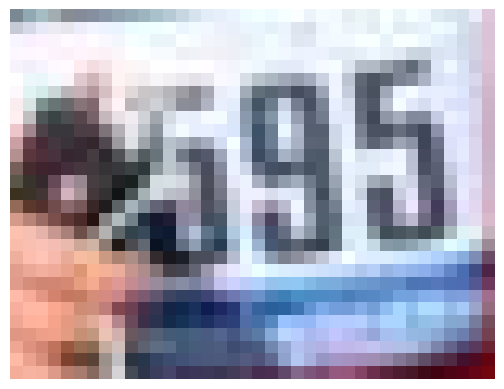

[2024/05/02 16:47:44] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017952919006347656
[2024/05/02 16:47:44] ppocr DEBUG: cls num  : 1, elapsed : 0.014954328536987305
[2024/05/02 16:47:44] ppocr DEBUG: rec_res num  : 1, elapsed : 0.281247615814209
path datasets/
[('360', 0.9907290935516357)]
360


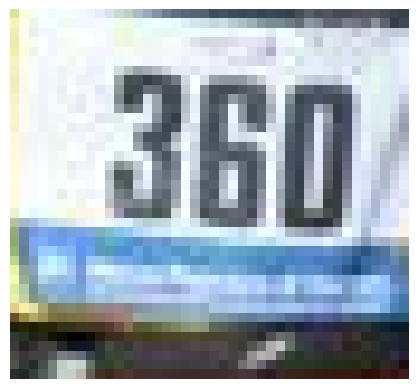

[2024/05/02 16:47:44] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.011992931365966797
[2024/05/02 16:47:44] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:44] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


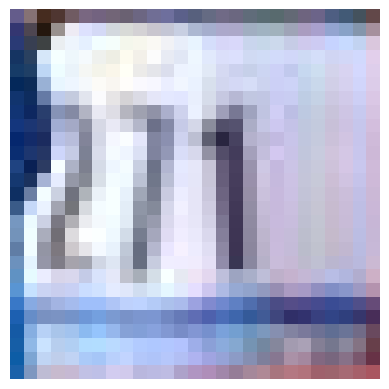

[2024/05/02 16:47:44] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.02293872833251953
[2024/05/02 16:47:44] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:44] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


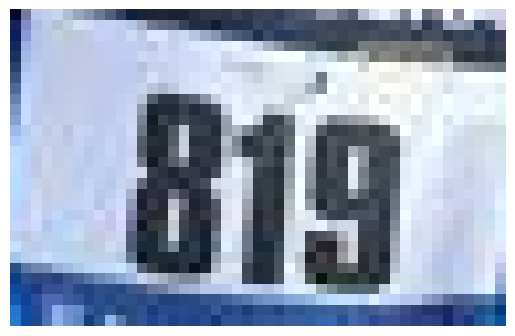

[2024/05/02 16:47:45] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.124664306640625
[2024/05/02 16:47:45] ppocr DEBUG: cls num  : 1, elapsed : 0.1685500144958496
[2024/05/02 16:47:45] ppocr DEBUG: rec_res num  : 1, elapsed : 0.16356539726257324
path datasets/
[('281', 0.9971410632133484)]
281


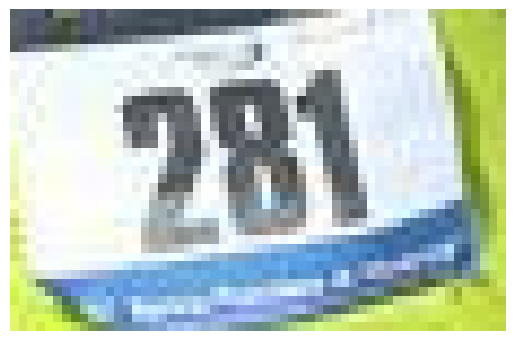

[2024/05/02 16:47:45] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.022938013076782227
[2024/05/02 16:47:45] ppocr DEBUG: cls num  : 1, elapsed : 0.022935152053833008
[2024/05/02 16:47:45] ppocr DEBUG: rec_res num  : 1, elapsed : 0.20046353340148926
path datasets/
[('819', 0.9934559464454651)]
819


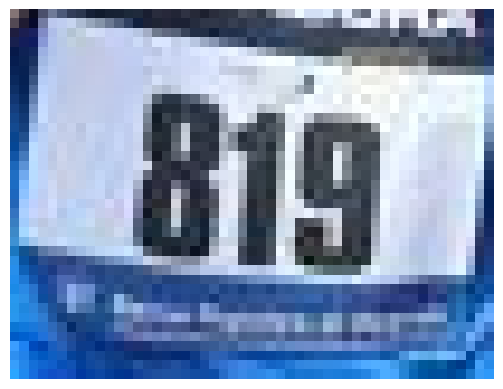


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\28.jpg: 1344x2016 9 dossards, 196.5ms
Speed: 89.8ms preprocess, 196.5ms inference, 2.0ms postprocess per image at shape (1, 3, 1344, 2016)
[2024/05/02 16:47:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.011970758438110352
[2024/05/02 16:47:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


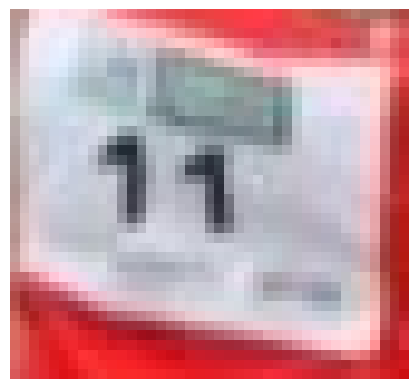

[2024/05/02 16:47:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.015953779220581055
[2024/05/02 16:47:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


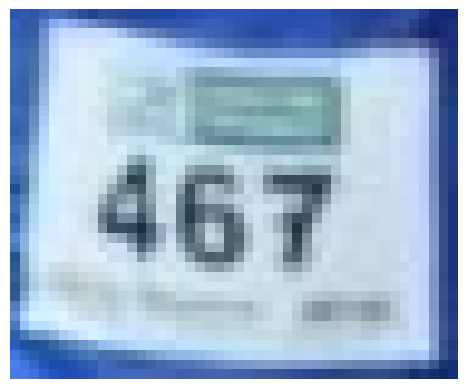

[2024/05/02 16:47:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.018950223922729492
[2024/05/02 16:47:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


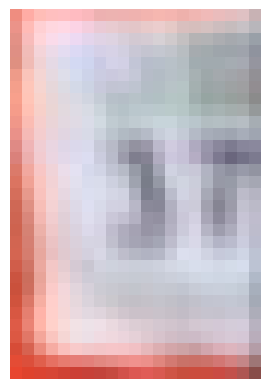

[2024/05/02 16:47:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.021941184997558594
[2024/05/02 16:47:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


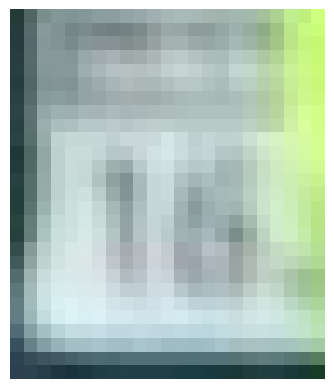

[2024/05/02 16:47:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.013964653015136719
[2024/05/02 16:47:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


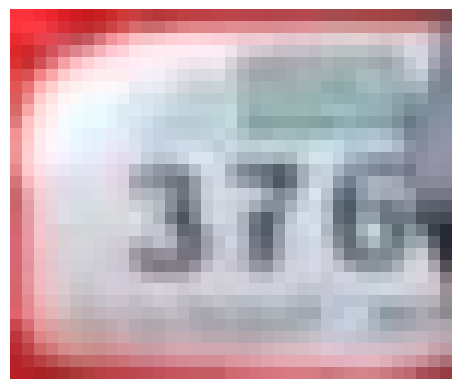

[2024/05/02 16:47:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.015957355499267578
[2024/05/02 16:47:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


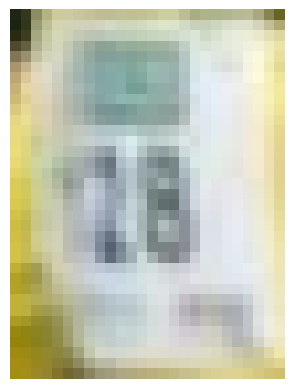

[2024/05/02 16:47:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.022938251495361328
[2024/05/02 16:47:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


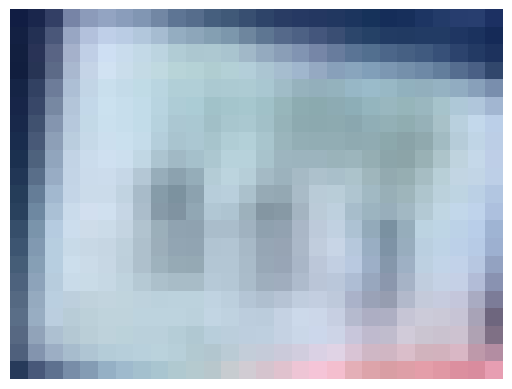

[2024/05/02 16:47:48] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.024935245513916016
[2024/05/02 16:47:48] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:48] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


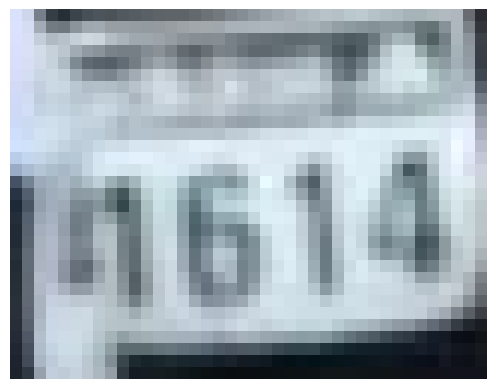

[2024/05/02 16:47:48] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.023933887481689453
[2024/05/02 16:47:48] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:48] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


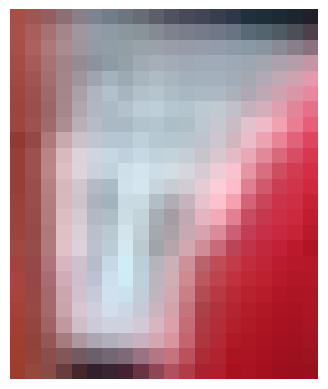


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\29.jpg: 1152x2016 5 dossards, 162.6ms
Speed: 84.8ms preprocess, 162.6ms inference, 6.0ms postprocess per image at shape (1, 3, 1152, 2016)
[2024/05/02 16:47:50] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.022939205169677734
[2024/05/02 16:47:50] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:50] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


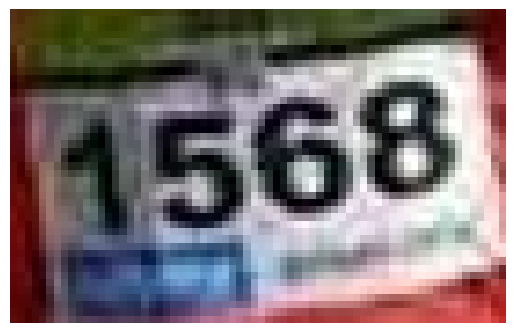

[2024/05/02 16:47:50] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.17653656005859375
[2024/05/02 16:47:50] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:50] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


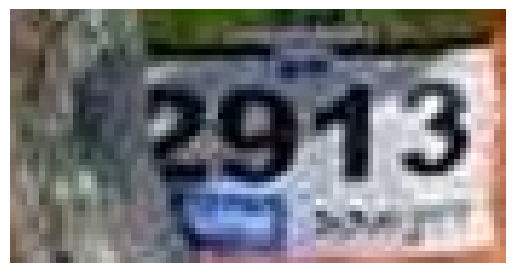

[2024/05/02 16:47:50] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.1186819076538086
[2024/05/02 16:47:50] ppocr DEBUG: cls num  : 1, elapsed : 0.022939443588256836
[2024/05/02 16:47:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.23836159706115723
path datasets/
[('2820', 0.9991558790206909)]
2820


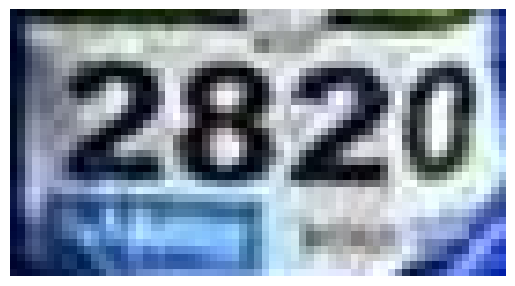

[2024/05/02 16:47:51] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01595592498779297
[2024/05/02 16:47:51] ppocr DEBUG: cls num  : 1, elapsed : 0.019947290420532227
[2024/05/02 16:47:51] ppocr DEBUG: rec_res num  : 1, elapsed : 0.20545077323913574
path datasets/


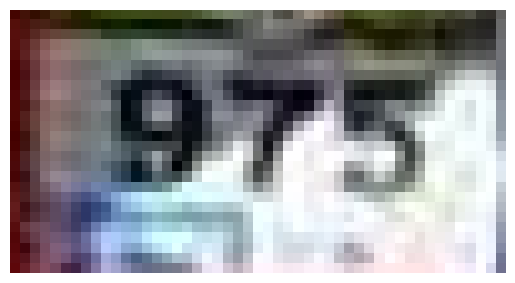

[2024/05/02 16:47:51] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.10325956344604492
[2024/05/02 16:47:51] ppocr DEBUG: cls num  : 3, elapsed : 0.12865757942199707
[2024/05/02 16:47:52] ppocr DEBUG: rec_res num  : 3, elapsed : 0.7280609607696533
path datasets/
[('2913', 0.9980865716934204)]
2913


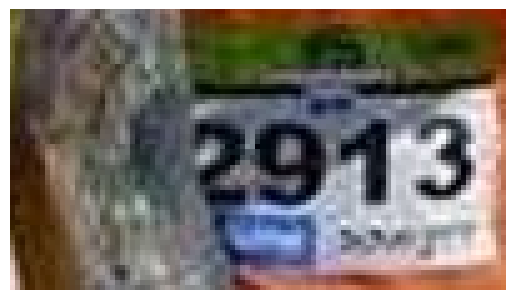


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\3.jpg: 2016x1344 3 dossards, 194.5ms
Speed: 160.7ms preprocess, 194.5ms inference, 4.0ms postprocess per image at shape (1, 3, 2016, 1344)
[2024/05/02 16:47:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.04188823699951172
[2024/05/02 16:47:54] ppocr DEBUG: cls num  : 1, elapsed : 0.013962745666503906
[2024/05/02 16:47:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.19547462463378906
path datasets/
[('321', 0.99843829870224)]
321


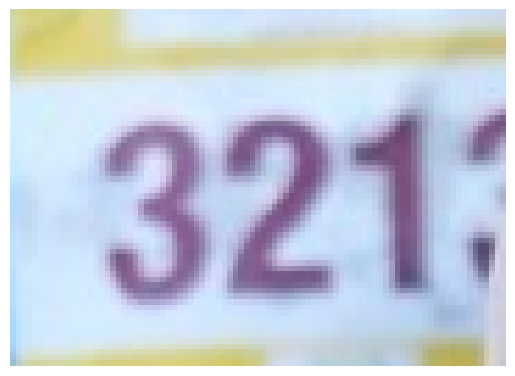

[2024/05/02 16:47:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019944429397583008
[2024/05/02 16:47:54] ppocr DEBUG: cls num  : 1, elapsed : 0.016954421997070312
[2024/05/02 16:47:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.24734020233154297
path datasets/
[('3421', 0.9994325637817383)]
3421


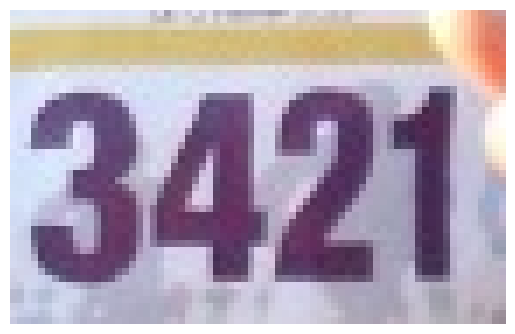

[2024/05/02 16:47:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.015993356704711914
[2024/05/02 16:47:55] ppocr DEBUG: cls num  : 1, elapsed : 0.017954587936401367
[2024/05/02 16:47:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.16456103324890137
path datasets/
[('3421', 0.9946037530899048)]
3421


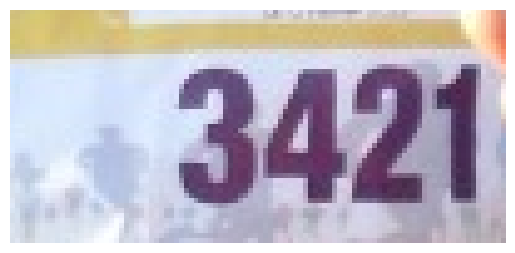


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\30.jpg: 1504x2016 2 dossards, 214.4ms
Speed: 58.8ms preprocess, 214.4ms inference, 3.0ms postprocess per image at shape (1, 3, 1504, 2016)
[2024/05/02 16:47:56] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.01495814323425293
[2024/05/02 16:47:56] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:56] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


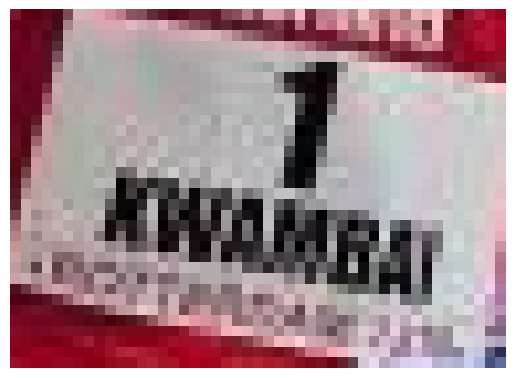

[2024/05/02 16:47:56] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.01795196533203125
[2024/05/02 16:47:56] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:56] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


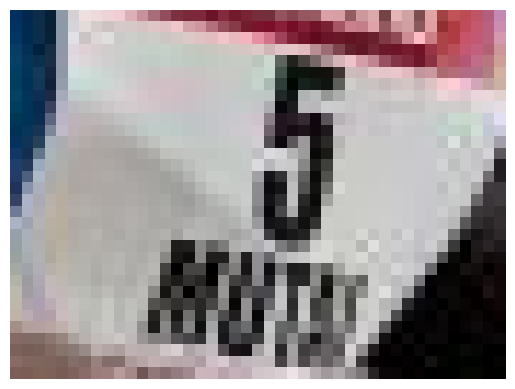


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\31.jpg: 1152x2016 1 dossard, 163.6ms
Speed: 34.9ms preprocess, 163.6ms inference, 3.0ms postprocess per image at shape (1, 3, 1152, 2016)
[2024/05/02 16:47:58] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.13463926315307617
[2024/05/02 16:47:58] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:47:58] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


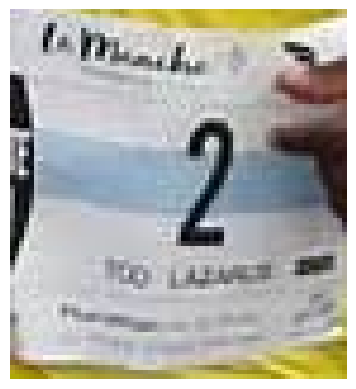


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\32.jpg: 1152x2016 1 dossard, 167.6ms
Speed: 43.9ms preprocess, 167.6ms inference, 6.0ms postprocess per image at shape (1, 3, 1152, 2016)
[2024/05/02 16:48:00] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.028920650482177734
[2024/05/02 16:48:00] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:00] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


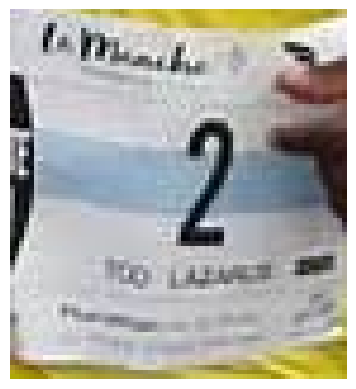


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\33.jpg: 1152x2016 (no detections), 167.6ms
Speed: 138.6ms preprocess, 167.6ms inference, 2.0ms postprocess per image at shape (1, 3, 1152, 2016)

image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\34.jpg: 1376x2016 6 dossards, 595.3ms
Speed: 42.9ms preprocess, 595.3ms inference, 4.0ms postprocess per image at shape (1, 3, 1376, 2016)
[2024/05/02 16:48:04] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.013961553573608398
[2024/05/02 16:48:04] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:04] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


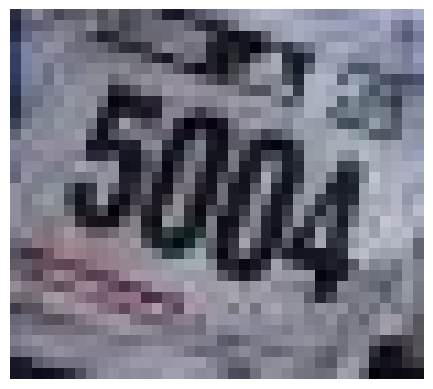

[2024/05/02 16:48:04] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.021940231323242188
[2024/05/02 16:48:04] ppocr DEBUG: cls num  : 1, elapsed : 0.0189511775970459
[2024/05/02 16:48:05] ppocr DEBUG: rec_res num  : 1, elapsed : 1.2037765979766846
path datasets/
[('5001', 0.9946486949920654)]
5001


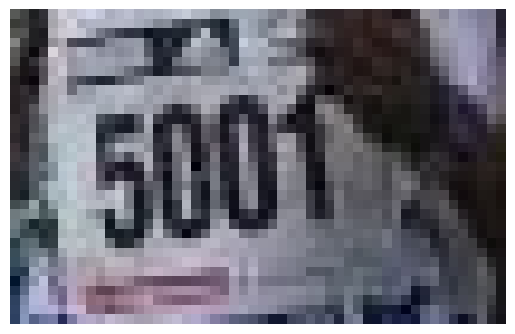

[2024/05/02 16:48:06] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.07181501388549805
[2024/05/02 16:48:06] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:06] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


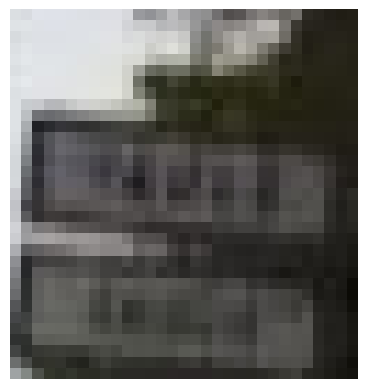

[2024/05/02 16:48:06] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.12348437309265137
[2024/05/02 16:48:06] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:06] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


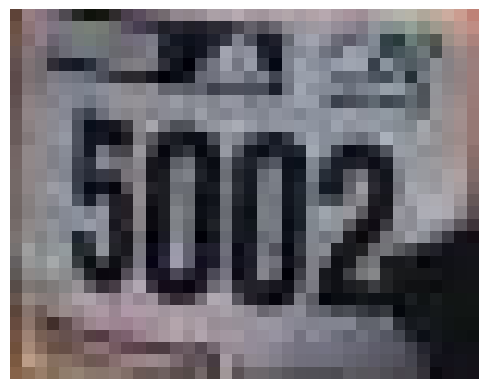

[2024/05/02 16:48:07] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.14717364311218262
[2024/05/02 16:48:07] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:07] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


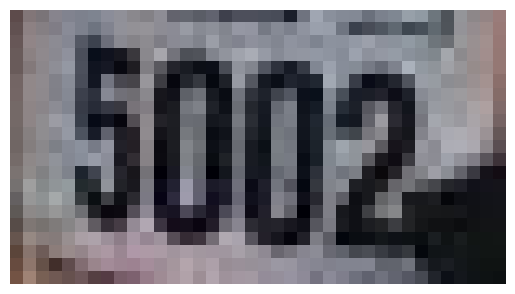

[2024/05/02 16:48:07] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.035004615783691406
[2024/05/02 16:48:07] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:07] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


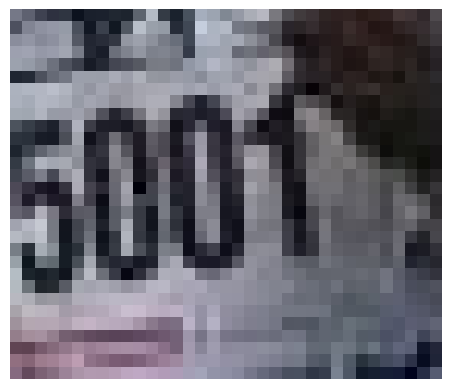


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\35.jpg: 1152x2016 4 dossards, 192.6ms
Speed: 257.2ms preprocess, 192.6ms inference, 6.0ms postprocess per image at shape (1, 3, 1152, 2016)
[2024/05/02 16:48:12] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.04587674140930176
[2024/05/02 16:48:12] ppocr DEBUG: cls num  : 1, elapsed : 0.02094244956970215
[2024/05/02 16:48:13] ppocr DEBUG: rec_res num  : 1, elapsed : 0.5657312870025635
path datasets/
[('JU08', 0.7430241703987122)]


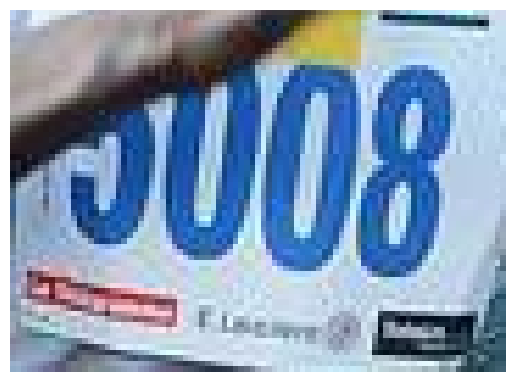

[2024/05/02 16:48:13] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.05352616310119629
[2024/05/02 16:48:13] ppocr DEBUG: cls num  : 2, elapsed : 0.1807410717010498
[2024/05/02 16:48:14] ppocr DEBUG: rec_res num  : 2, elapsed : 1.3992419242858887
path datasets/
[('PUmA', 0.6515035629272461), ('5007', 0.9991466403007507)]
5007


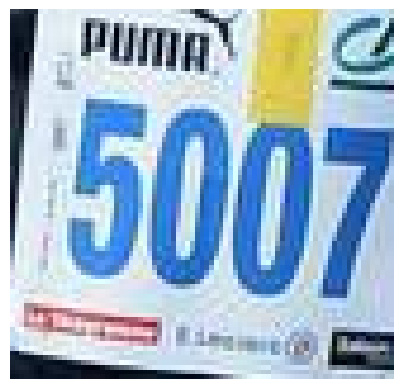

[2024/05/02 16:48:15] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0299222469329834
[2024/05/02 16:48:15] ppocr DEBUG: cls num  : 1, elapsed : 0.023934364318847656
[2024/05/02 16:48:15] ppocr DEBUG: rec_res num  : 1, elapsed : 0.6078329086303711
path datasets/
[('001', 0.9954354763031006)]
001


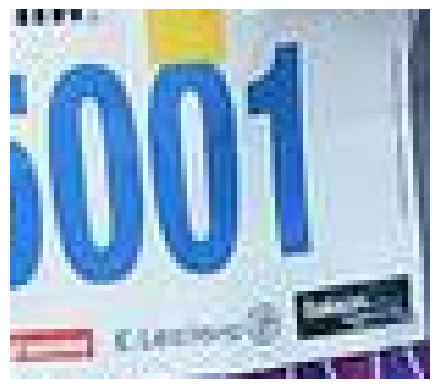

[2024/05/02 16:48:16] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.06881070137023926
[2024/05/02 16:48:16] ppocr DEBUG: cls num  : 2, elapsed : 0.054938316345214844
[2024/05/02 16:48:17] ppocr DEBUG: rec_res num  : 2, elapsed : 0.9694087505340576
path datasets/
[('PumA.', 0.6697162389755249), ('5001', 0.9990482330322266)]
5001


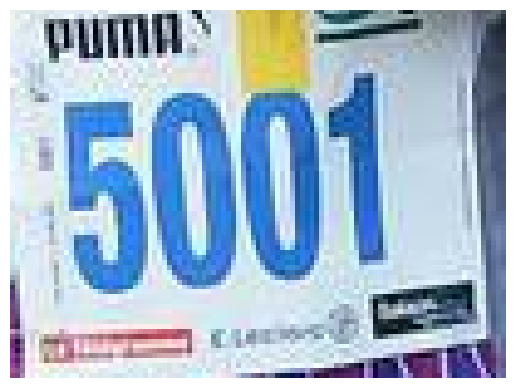


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\36.jpg: 1152x2016 6 dossards, 177.1ms
Speed: 187.0ms preprocess, 177.1ms inference, 8.0ms postprocess per image at shape (1, 3, 1152, 2016)
[2024/05/02 16:48:23] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.0780491828918457
[2024/05/02 16:48:23] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:23] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


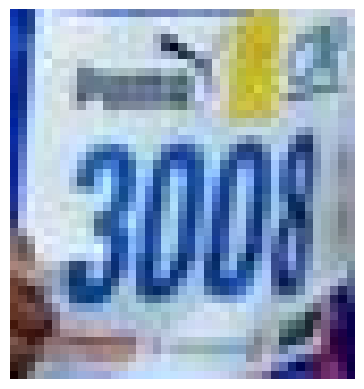

[2024/05/02 16:48:23] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.034905433654785156
[2024/05/02 16:48:23] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:23] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


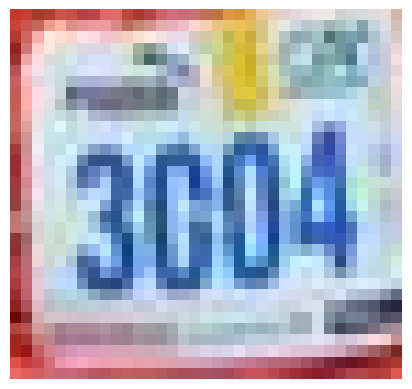

[2024/05/02 16:48:23] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.03702950477600098
[2024/05/02 16:48:23] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:23] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


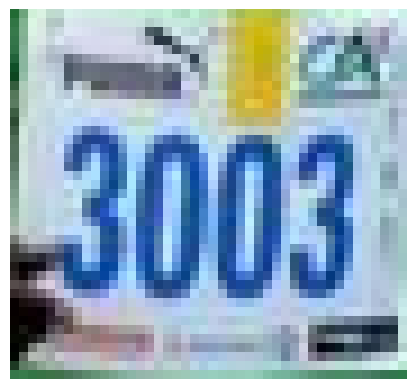

[2024/05/02 16:48:23] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.026984453201293945
[2024/05/02 16:48:23] ppocr DEBUG: cls num  : 1, elapsed : 0.024082660675048828
[2024/05/02 16:48:24] ppocr DEBUG: rec_res num  : 1, elapsed : 0.47744274139404297
path datasets/


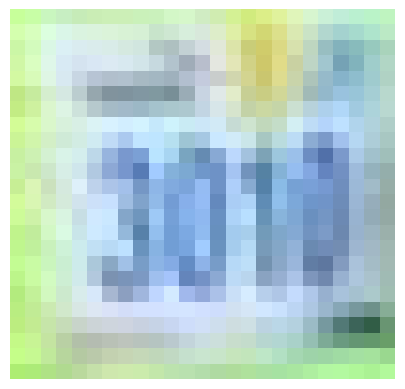

[2024/05/02 16:48:24] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.03993082046508789
[2024/05/02 16:48:24] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:24] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


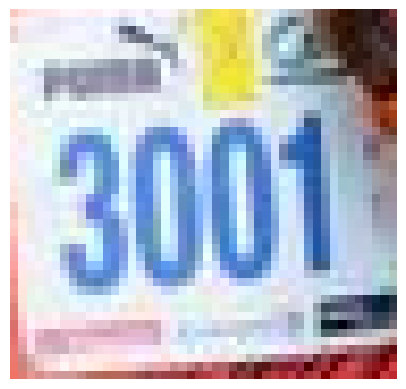

[2024/05/02 16:48:24] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.04704427719116211
[2024/05/02 16:48:24] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:24] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


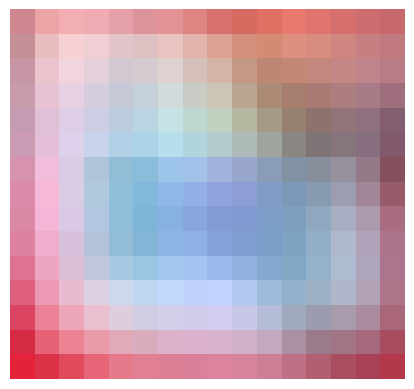


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\4.jpg: 1344x2016 10 dossards, 199.4ms
Speed: 166.9ms preprocess, 199.4ms inference, 7.0ms postprocess per image at shape (1, 3, 1344, 2016)
[2024/05/02 16:48:27] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.043880462646484375
[2024/05/02 16:48:27] ppocr DEBUG: cls num  : 1, elapsed : 0.02692699432373047
[2024/05/02 16:48:28] ppocr DEBUG: rec_res num  : 1, elapsed : 0.40691256523132324
path datasets/
[('1984', 0.999069094657898)]
1984


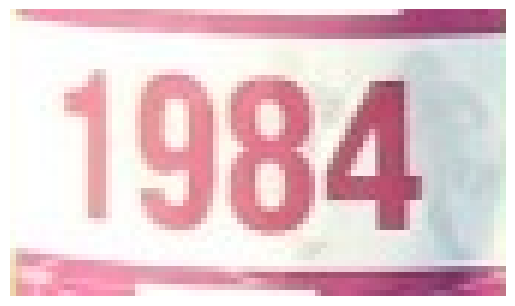

[2024/05/02 16:48:28] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.029918193817138672
[2024/05/02 16:48:28] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:28] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


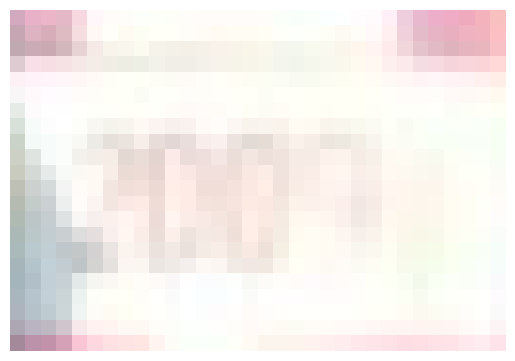

[2024/05/02 16:48:28] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.08405399322509766
[2024/05/02 16:48:28] ppocr DEBUG: cls num  : 1, elapsed : 0.05385398864746094
[2024/05/02 16:48:28] ppocr DEBUG: rec_res num  : 1, elapsed : 0.40980958938598633
path datasets/
[('36', 0.9986594915390015)]
36


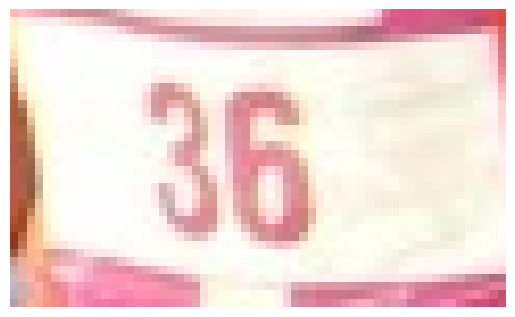

[2024/05/02 16:48:29] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.041944265365600586
[2024/05/02 16:48:29] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:29] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


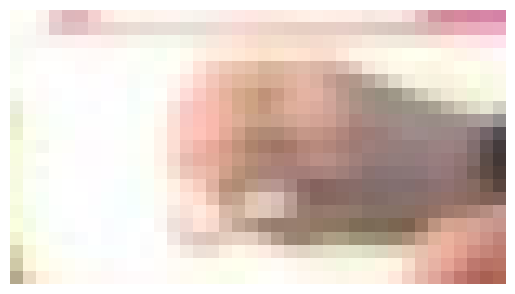

[2024/05/02 16:48:29] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03590536117553711
[2024/05/02 16:48:29] ppocr DEBUG: cls num  : 1, elapsed : 0.048871517181396484
[2024/05/02 16:48:29] ppocr DEBUG: rec_res num  : 1, elapsed : 0.3480861186981201
path datasets/
[('27', 0.9987239837646484)]
27


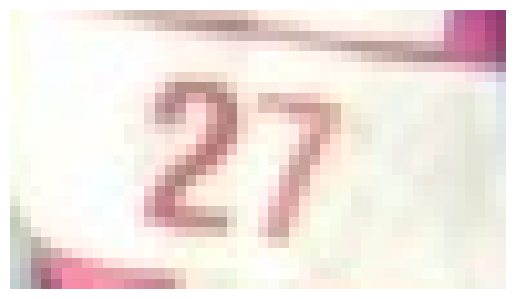

[2024/05/02 16:48:29] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.026953935623168945
[2024/05/02 16:48:29] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:29] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


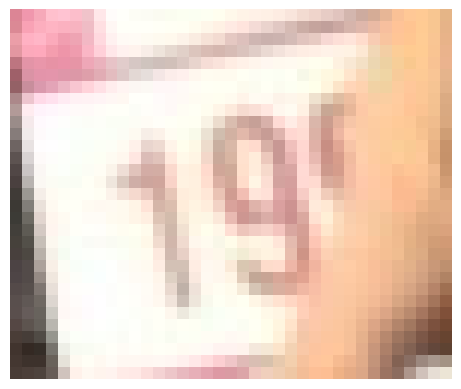

[2024/05/02 16:48:30] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.035005807876586914
[2024/05/02 16:48:30] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:30] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


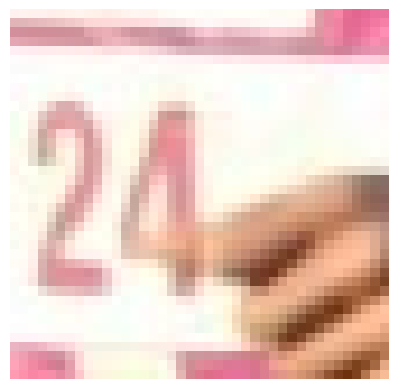

[2024/05/02 16:48:30] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.02893376350402832
[2024/05/02 16:48:30] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:30] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


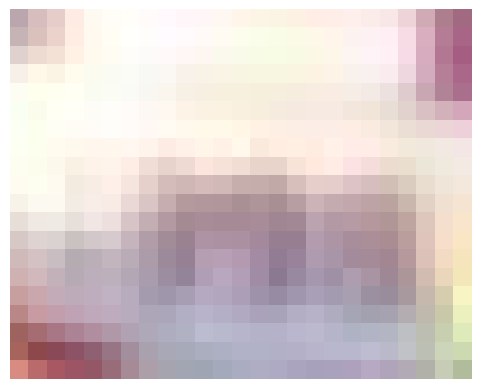

[2024/05/02 16:48:30] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.022938251495361328
[2024/05/02 16:48:30] ppocr DEBUG: cls num  : 1, elapsed : 0.029919147491455078
[2024/05/02 16:48:30] ppocr DEBUG: rec_res num  : 1, elapsed : 0.38562631607055664
path datasets/
[('1980', 0.8303936123847961)]
1980


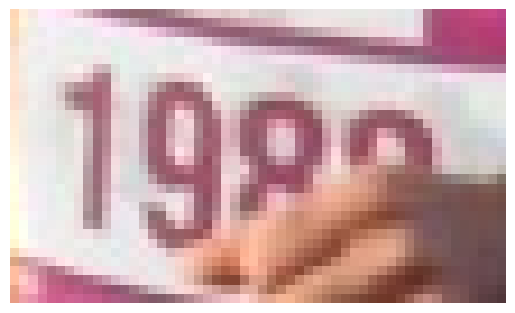

[2024/05/02 16:48:30] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0359039306640625
[2024/05/02 16:48:31] ppocr DEBUG: cls num  : 1, elapsed : 0.042885780334472656
[2024/05/02 16:48:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.34537625312805176
path datasets/
[('1792', 0.9994596242904663)]
1792


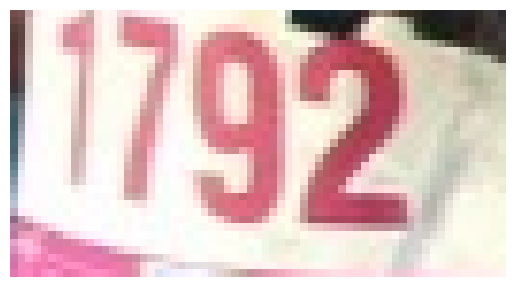


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\5.jpg: 1344x2016 4 dossards, 203.5ms
Speed: 92.8ms preprocess, 203.5ms inference, 3.0ms postprocess per image at shape (1, 3, 1344, 2016)
[2024/05/02 16:48:34] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.22273969650268555
[2024/05/02 16:48:34] ppocr DEBUG: cls num  : 1, elapsed : 0.03690171241760254
[2024/05/02 16:48:34] ppocr DEBUG: rec_res num  : 1, elapsed : 0.24088311195373535
path datasets/
[('994', 0.9990746378898621)]
994


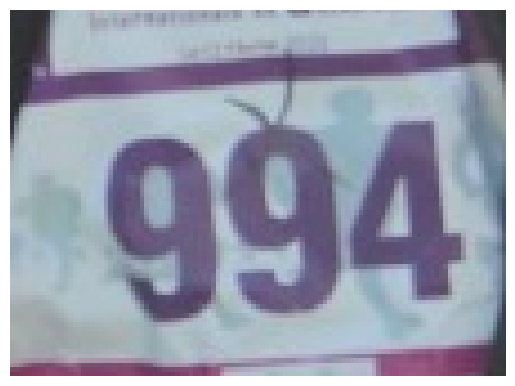

[2024/05/02 16:48:34] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.31267666816711426
[2024/05/02 16:48:34] ppocr DEBUG: cls num  : 2, elapsed : 0.024933815002441406
[2024/05/02 16:48:35] ppocr DEBUG: rec_res num  : 2, elapsed : 0.6555604934692383
path datasets/
[('995', 0.9992888569831848)]
995


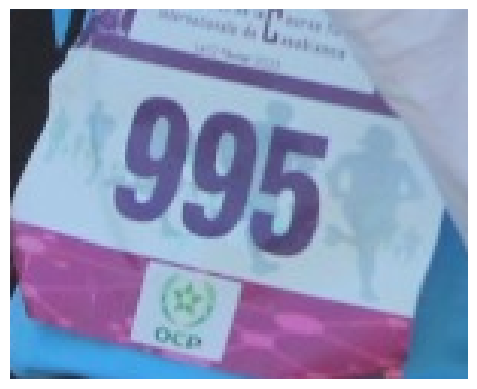

[2024/05/02 16:48:35] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.26430273056030273
[2024/05/02 16:48:35] ppocr DEBUG: cls num  : 1, elapsed : 0.014959335327148438
[2024/05/02 16:48:35] ppocr DEBUG: rec_res num  : 1, elapsed : 0.22391676902770996
path datasets/
[('1447', 0.9991961121559143)]
1447


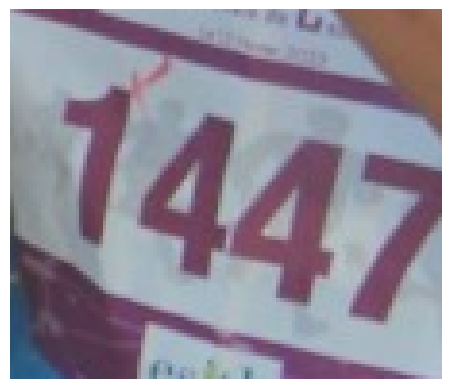

[2024/05/02 16:48:36] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.0169522762298584
[2024/05/02 16:48:36] ppocr DEBUG: cls num  : 2, elapsed : 0.027922391891479492
[2024/05/02 16:48:36] ppocr DEBUG: rec_res num  : 2, elapsed : 0.5385689735412598
path datasets/
[('995', 0.9993754029273987), ('()', 0.7862949371337891)]
995


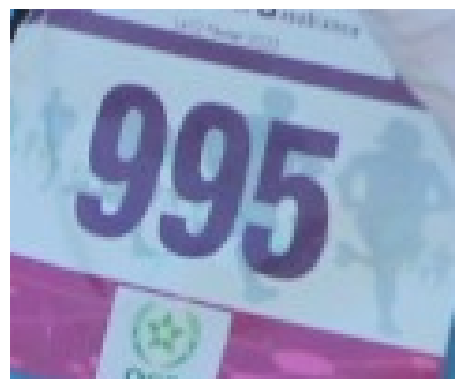


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\6.jpg: 1344x2016 4 dossards, 208.4ms
Speed: 83.8ms preprocess, 208.4ms inference, 5.0ms postprocess per image at shape (1, 3, 1344, 2016)
[2024/05/02 16:48:38] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01994633674621582
[2024/05/02 16:48:38] ppocr DEBUG: cls num  : 1, elapsed : 0.019944190979003906
[2024/05/02 16:48:38] ppocr DEBUG: rec_res num  : 1, elapsed : 0.17254018783569336
path datasets/
[('1064', 0.9948544502258301)]
1064


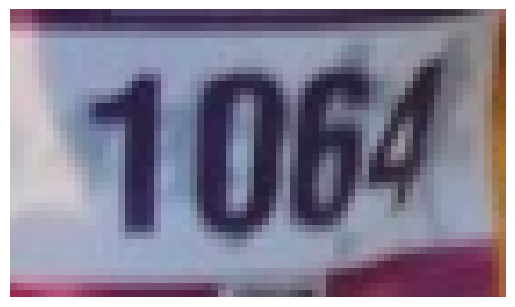

[2024/05/02 16:48:38] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.01994800567626953
[2024/05/02 16:48:38] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:38] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


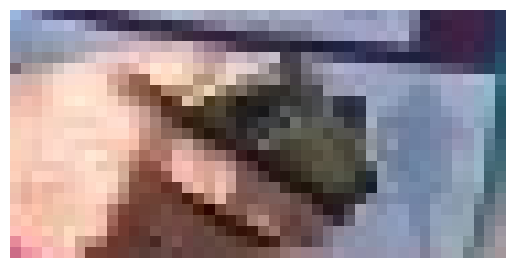

[2024/05/02 16:48:38] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.014972448348999023
[2024/05/02 16:48:38] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:38] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


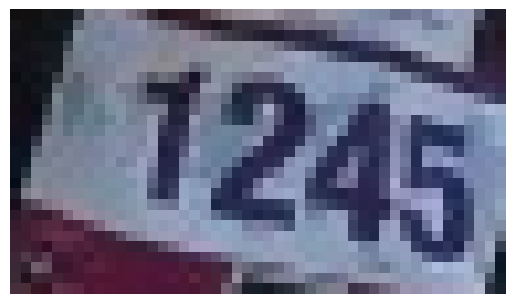

[2024/05/02 16:48:39] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.20402050018310547
[2024/05/02 16:48:39] ppocr DEBUG: cls num  : 2, elapsed : 0.025929689407348633
[2024/05/02 16:48:39] ppocr DEBUG: rec_res num  : 2, elapsed : 0.4478020668029785
path datasets/
[('NAOU', 0.991959273815155), ('26', 0.9813721179962158)]
26


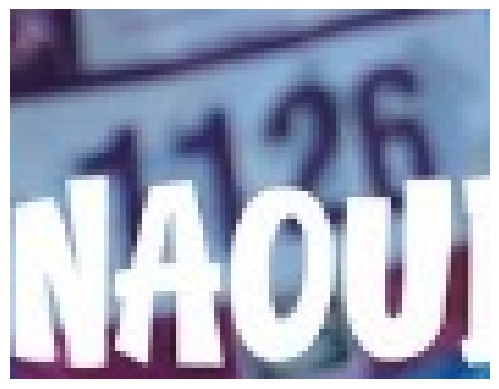


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\7.jpg: 2016x1344 2 dossards, 198.6ms
Speed: 158.4ms preprocess, 198.6ms inference, 2.0ms postprocess per image at shape (1, 3, 2016, 1344)
[2024/05/02 16:48:42] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.19603657722473145
[2024/05/02 16:48:42] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:42] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


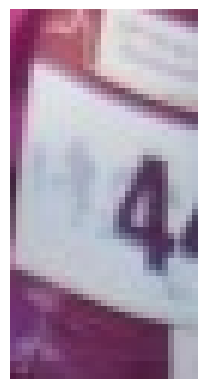

[2024/05/02 16:48:42] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.331165075302124
[2024/05/02 16:48:42] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:42] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


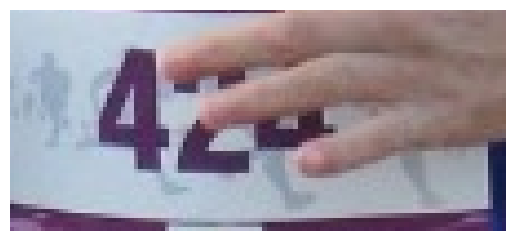


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\8.jpg: 2016x1344 1 dossard, 203.0ms
Speed: 66.8ms preprocess, 203.0ms inference, 7.0ms postprocess per image at shape (1, 3, 2016, 1344)
[2024/05/02 16:48:44] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.04590344429016113
[2024/05/02 16:48:44] ppocr DEBUG: cls num  : 1, elapsed : 0.02094554901123047
[2024/05/02 16:48:45] ppocr DEBUG: rec_res num  : 1, elapsed : 0.4072229862213135
path datasets/
[('1619', 0.9916396141052246)]
1619


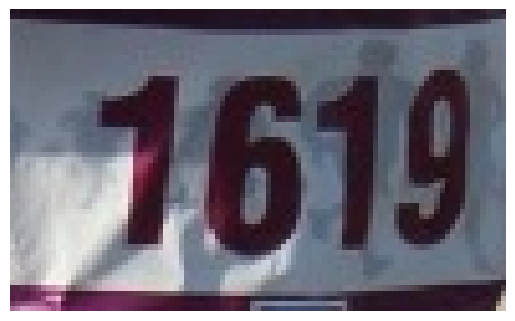


image 1/1 c:\Users\dexte\OneDrive\Documents\GitHub\Marathon-bib-detection\datasets\9.jpg: 1344x2016 9 dossards, 217.6ms
Speed: 126.2ms preprocess, 217.6ms inference, 8.0ms postprocess per image at shape (1, 3, 1344, 2016)
[2024/05/02 16:48:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.03037095069885254
[2024/05/02 16:48:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


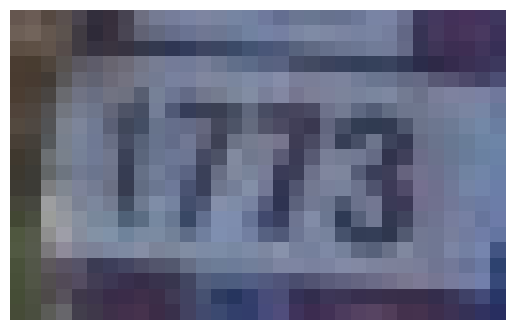

[2024/05/02 16:48:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.04886794090270996
[2024/05/02 16:48:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


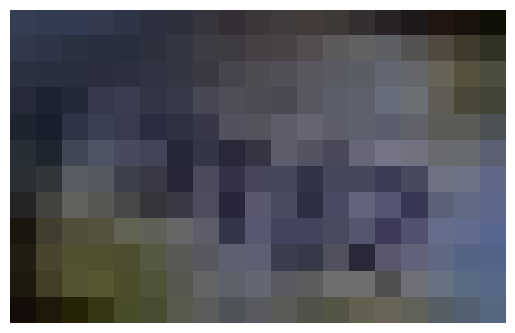

[2024/05/02 16:48:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.02194356918334961
[2024/05/02 16:48:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


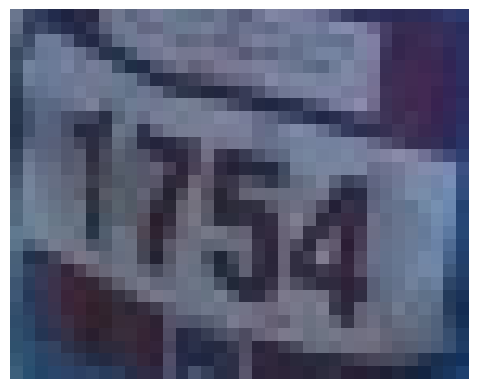

[2024/05/02 16:48:47] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.04089069366455078
[2024/05/02 16:48:47] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:47] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


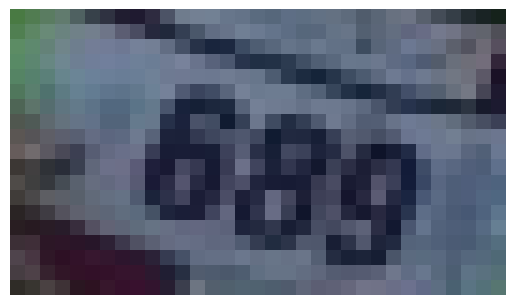

[2024/05/02 16:48:48] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03490781784057617
[2024/05/02 16:48:48] ppocr DEBUG: cls num  : 1, elapsed : 0.024933338165283203
[2024/05/02 16:48:48] ppocr DEBUG: rec_res num  : 1, elapsed : 0.3887622356414795
path datasets/
[('801', 0.9962467551231384)]
801


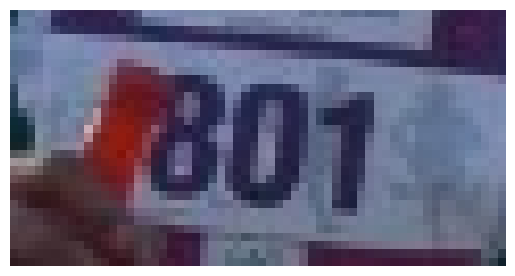

[2024/05/02 16:48:48] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.023947954177856445
[2024/05/02 16:48:48] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:48] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


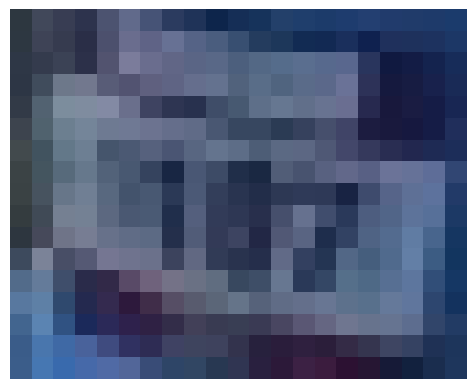

[2024/05/02 16:48:48] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.020943880081176758
[2024/05/02 16:48:48] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:48] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


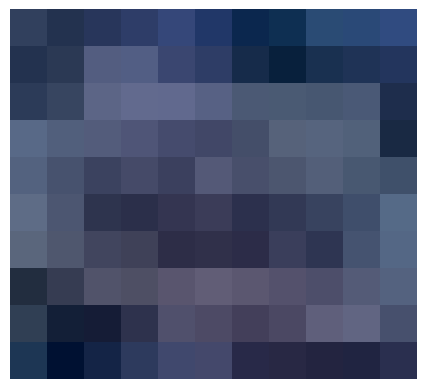

[2024/05/02 16:48:48] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.012976884841918945
[2024/05/02 16:48:48] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:48] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


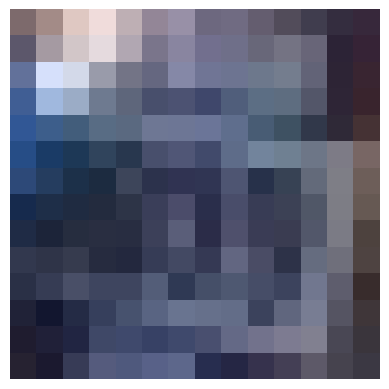

[2024/05/02 16:48:48] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.022937297821044922
[2024/05/02 16:48:48] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/05/02 16:48:48] ppocr DEBUG: rec_res num  : 0, elapsed : 0.0
path datasets/


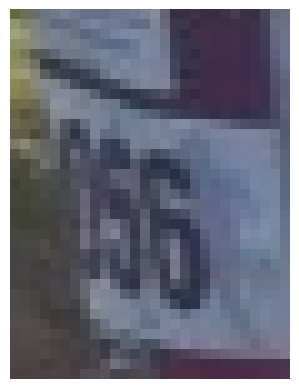

In [1]:
from paddleocr import PaddleOCR
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import os

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

ocr = PaddleOCR(use_angle_cls=True,lang='en')

def detect_bib_number(image):
  model = YOLO("best.pt")
  model.to('cuda')
  results = model.predict(image, imgsz = 2016)
  return results

def extract_text(result):
  first_elements = [text[1] for sublist in result for text in sublist]
  return first_elements

def remove_non_alphanumeric(text):
    return ''.join(char for char in text if char.isalnum())

def remove_non_alphanumeric(text):
    return ''.join(char for char in text if char.isalnum())

def filter_wanted_text(extracted_text, text_confidence_score):
    # remove text with low confidence score
    text = [x for x in extracted_text if x[1] > text_confidence_score]
    # get only the text
    text = [x[0] for x in text]
    # remove non alphanumeric characters
    text = [remove_non_alphanumeric(x) for x in text]
    # remove text that are not digit
    text = [x for x in text if x.isdigit()]
    return text[0]

response_json = []
bib_numbers = []
images_path = 'datasets/'
text_confidence_score = 0.3
for filename in os.listdir(images_path):
    # Check if the file is an image
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
      # Construct the full path to the image
      image_path = os.path.join(images_path, filename)
      # Perform OCR on the image
      results = detect_bib_number(image_path)
      image = cv2.imread(image_path)
      for result in results:
        bib_numbers = []
        for box in result.boxes:
          x1, y1, x2, y2 = box.xyxy[0]
          roi = image[int(y1):int(y2), int(x1):int(x2),:]
          bib_number = ocr.ocr(roi,cls=True)
          print('path', images_path)
          try :
            print(extract_text(bib_number))
            filtered_text = filter_wanted_text(extract_text(bib_number),text_confidence_score)
            bib_numbers.append(filtered_text)
            bib_numbers = list(set(bib_numbers))
            print(filtered_text)
          except :
            pass
          plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
          plt.axis('off')
          plt.show()
        response_json.append({'image_path': image_path, 'detected_numbers': bib_numbers})

execution time = 64.5s

In [2]:
response_json

[{'image_path': 'datasets/1.jpg', 'detected_numbers': ['230', '906']},
 {'image_path': 'datasets/10.jpg', 'detected_numbers': ['1051']},
 {'image_path': 'datasets/11.jpg',
  'detected_numbers': ['2901', '2161', '2116']},
 {'image_path': 'datasets/12.jpg', 'detected_numbers': []},
 {'image_path': 'datasets/13.jpg', 'detected_numbers': []},
 {'image_path': 'datasets/14.jpg',
  'detected_numbers': ['230', '231', '578', '233']},
 {'image_path': 'datasets/15.jpg',
  'detected_numbers': ['1989', '66', '2124', '1984']},
 {'image_path': 'datasets/16.jpg', 'detected_numbers': ['3262']},
 {'image_path': 'datasets/17.jpg', 'detected_numbers': ['34', '67']},
 {'image_path': 'datasets/18.jpg', 'detected_numbers': []},
 {'image_path': 'datasets/19.jpg', 'detected_numbers': []},
 {'image_path': 'datasets/2.jpg', 'detected_numbers': []},
 {'image_path': 'datasets/20.jpg', 'detected_numbers': []},
 {'image_path': 'datasets/21.jpg', 'detected_numbers': ['39']},
 {'image_path': 'datasets/22.jpg',
  'dete

In [3]:
import pandas as pd
df = pd.DataFrame(response_json)
df

image_path              detected_numbers
0    datasets/1.jpg                    [230, 906]
1   datasets/10.jpg                        [1051]
2   datasets/11.jpg            [2901, 2161, 2116]
3   datasets/12.jpg                            []
4   datasets/13.jpg                            []
5   datasets/14.jpg          [230, 231, 578, 233]
6   datasets/15.jpg        [1989, 66, 2124, 1984]
7   datasets/16.jpg                        [3262]
8   datasets/17.jpg                      [34, 67]
9   datasets/18.jpg                            []
10  datasets/19.jpg                            []
11   datasets/2.jpg                            []
12  datasets/20.jpg                            []
13  datasets/21.jpg                          [39]
14  datasets/22.jpg            [34, 4295, 40, 33]
15  datasets/23.jpg                       [9, 61]
16  datasets/24.jpg                     [35, 219]
17  datasets/25.jpg  [1759, 1860, 1833, 1795, 17]
18  datasets/26.jpg                            []
19  datasets/27.jpg               [360, 281, 819]
20  datasets/28.jpg                            []
21  datasets/29.jpg                  [2820, 2913]
22   datasets/3.jpg                   [321, 3421]
23  datasets/30.jpg                            []
24  datasets/31.jpg                            []
25  datasets/32.jpg                            []
26  datasets/33.jpg                            []
27  datasets/34.jpg                        [5001]
28  datasets/35.jpg             [001, 5001, 5007]
29  datasets/36.jpg                            []
30   datasets/4.jpg    [1984, 1980, 1792, 36, 27]
31   datasets/5.jpg              [1447, 994, 995]
32   datasets/6.jpg                    [1064, 26]
33   datasets/7.jpg                            []
34   datasets/8.jpg                        [1619]
35   datasets/9.jpg                         [801]

In [4]:
df.to_csv('bib_numbers.csv', index=False)

In [5]:
df['number_count'] = df['detected_numbers'].apply(lambda x: len(x))

# Print the DataFrame with the count of numbers in each list
df

image_path              detected_numbers  number_count
0    datasets/1.jpg                    [230, 906]             2
1   datasets/10.jpg                        [1051]             1
2   datasets/11.jpg            [2901, 2161, 2116]             3
3   datasets/12.jpg                            []             0
4   datasets/13.jpg                            []             0
5   datasets/14.jpg          [230, 231, 578, 233]             4
6   datasets/15.jpg        [1989, 66, 2124, 1984]             4
7   datasets/16.jpg                        [3262]             1
8   datasets/17.jpg                      [34, 67]             2
9   datasets/18.jpg                            []             0
10  datasets/19.jpg                            []             0
11   datasets/2.jpg                            []             0
12  datasets/20.jpg                            []             0
13  datasets/21.jpg                          [39]             1
14  datasets/22.jpg            [34, 4295, 40, 33]             4
15  datasets/23.jpg                       [9, 61]             2
16  datasets/24.jpg                     [35, 219]             2
17  datasets/25.jpg  [1759, 1860, 1833, 1795, 17]             5
18  datasets/26.jpg                            []             0
19  datasets/27.jpg               [360, 281, 819]             3
20  datasets/28.jpg                            []             0
21  datasets/29.jpg                  [2820, 2913]             2
22   datasets/3.jpg                   [321, 3421]             2
23  datasets/30.jpg                            []             0
24  datasets/31.jpg                            []             0
25  datasets/32.jpg                            []             0
26  datasets/33.jpg                            []             0
27  datasets/34.jpg                        [5001]             1
28  datasets/35.jpg             [001, 5001, 5007]             3
29  datasets/36.jpg                            []             0
30   datasets/4.jpg    [1984, 1980, 1792, 36, 27]             5
31   datasets/5.jpg              [1447, 994, 995]             3
32   datasets/6.jpg                    [1064, 26]             2
33   datasets/7.jpg                            []             0
34   datasets/8.jpg                        [1619]             1
35   datasets/9.jpg                         [801]             1

In [6]:
df['number_count'].sum()

54

In [ ]:
/content/drive/MyDrive/datasets/3.jpg	[321, 3421, 3421]